<a href="https://colab.research.google.com/github/sundar911/topic_modeling/blob/main/cleaning_preprocessing_and_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##setup

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from scipy.stats import norm
from datetime import datetime

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import nltk
nltk.download('words')
from nltk.corpus import words

"taj" in words.words()

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Tourism | NITT Sundar/data_collection/final.csv').drop('Unnamed: 0', axis=1)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Tourism | NITT Sundar/eda/eda_trial.csv')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Tourism | NITT Sundar/data_collection/final_no_dupes.csv')

In [ ]:
df.shape

(521402, 12)

In [ ]:
df.tail()

,hotel_name,review,rating,precautions,amenities,trip_type,room_features,room_types,location,review_heading,cleaned_review,Month,Year,Date,price_low,price_high
521397,"Red Fox Hotel, Bhiwadi",It was indeed pleasurable stay at Red Fox Bhiw...,4,All linens sanitised in high-temperature wash\...,Free parking\nFree High Speed Internet (WiFi)\...,NaN,Air conditioning\nDesk\nFireplace\nRoom servic...,Non-smoking rooms\nSuites\nFamily rooms,Bhiwadi,Pleasant stay at Red Fox Bhiwadi,indeed pleasurable stay red fox exterior need ...,February,2019,2019-02-01,2456,4541
521398,Matsya Vilas,"Place where u can fell the nature, location is...",5,NaN,Free parking\nFree internet\nPool\nFree breakf...,NaN,Bathrobes\nAir conditioning\nDesk\nHousekeepin...,Non-smoking rooms\nFamily rooms,Mandawa,Rejuvenating Nature,place fell nature location nice beautiful hote...,February,2020,2020-02-01,3858,5936
521399,Matsya Vilas,Our family stayed two nights here in two bedro...,3,NaN,Free parking\nFree internet\nPool\nFree breakf...,NaN,Bathrobes\nAir conditioning\nDesk\nHousekeepin...,Non-smoking rooms\nFamily rooms,Mandawa,Cold in January,family stay two night two hotel situate 5km to...,January,2020,2020-01-01,3858,5936
521400,Matsya Vilas,A comfortable hotel with nice room and grounds...,3,NaN,Free parking\nFree internet\nPool\nFree breakf...,NaN,Bathrobes\nAir conditioning\nDesk\nHousekeepin...,Non-smoking rooms\nFamily rooms,Mandawa,"Nice hotel, but no beer!",comfortable hotel nice room grounds food good ...,May,2018,2018-05-01,3858,5936
521401,Matsya Vilas,I would say it's a good place to visit once. S...,4,NaN,Free parking\nFree internet\nPool\nFree breakf...,NaN,Bathrobes\nAir conditioning\nDesk\nHousekeepin...,Non-smoking rooms\nFamily rooms,Mandawa,Confortable Stay,would say good place visit temple close resort...,January,2018,2018-01-01,3858,5936


In [ ]:
df.hotel_name.nunique()

2418

In [ ]:
df.location.nunique()

388

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Tourism | NITT Sundar/eda/eda_trial.csv')

In [ ]:
df.head()

,hotel_name,review,rating,precautions,amenities,trip_type,room_features,room_types,location,review_heading,cleaned_review,Month,Year,Date,price_low,price_high
0,Svelte Hotel and Personal Suites,Decided to stay in the hotel to celebrate a fr...,5,NaN,Free parking\nWifi\nPool\nFitness Centre with ...,Travelled with friends,Air conditioning\nHousekeeping\nRoom service\n...,Non-smoking rooms\nSuites,New Delhi,Good Hotel,decide stay hotel celebrate friend birthday re...,February,2021,2021-02-01,6396,9231
1,Svelte Hotel and Personal Suites,"Nice Hotel , Room Size was very good , Mu room...",4,NaN,Free parking\nWifi\nPool\nFitness Centre with ...,Travelled on business,Air conditioning\nHousekeeping\nRoom service\n...,Non-smoking rooms\nSuites,New Delhi,Visit - 21st March,nice hotel room size good mu room 404 request ...,March,2021,2021-03-01,6396,9231
2,Svelte Hotel and Personal Suites,Well clearly this hotel didn't stand close to ...,1,NaN,Free parking\nWifi\nPool\nFitness Centre with ...,NaN,Air conditioning\nHousekeeping\nRoom service\n...,Non-smoking rooms\nSuites,New Delhi,Not Worth In Anyway,well clearly hotel stand close speak even mana...,February,2020,2020-02-01,6396,9231
3,Svelte Hotel and Personal Suites,Average hotel with a great locational plus poi...,3,NaN,Free parking\nWifi\nPool\nFitness Centre with ...,NaN,Air conditioning\nHousekeeping\nRoom service\n...,Non-smoking rooms\nSuites,New Delhi,Mediocre place,average hotel great locational plus point room...,February,2020,2020-02-01,6396,9231
4,Svelte Hotel and Personal Suites,They are good but sometimes they act as 2 star...,3,NaN,Free parking\nWifi\nPool\nFitness Centre with ...,Travelled on business,Air conditioning\nHousekeeping\nRoom service\n...,Non-smoking rooms\nSuites,New Delhi,Behviour,good sometimes act 2 star property frequently ...,February,2020,2020-02-01,6396,9231


In [ ]:
df.to_csv('/content/drive/MyDrive/Tourism | NITT Sundar/eda/eda_trial.csv', index=False)

## ratings

In [ ]:
df.head()

,hotel_name,review,rating,precautions,amenities,date_of_stay,trip_type,room_features,room_types,price_range,location,review_heading
0,Svelte Hotel and Personal Suites,Decided to stay in the hotel to celebrate a fr...,50,NaN,Free parking\nWifi\nPool\nFitness Centre with ...,February 2021,Travelled with friends,Air conditioning\nHousekeeping\nRoom service\n...,Non-smoking rooms\nSuites,"₹ 6,396 - ₹ 9,231",New Delhi,Good Hotel
1,Svelte Hotel and Personal Suites,"Nice Hotel , Room Size was very good , Mu room...",40,NaN,Free parking\nWifi\nPool\nFitness Centre with ...,March 2021,Travelled on business,Air conditioning\nHousekeeping\nRoom service\n...,Non-smoking rooms\nSuites,"₹ 6,396 - ₹ 9,231",New Delhi,Visit - 21st March
2,Svelte Hotel and Personal Suites,Well clearly this hotel didn't stand close to ...,10,NaN,Free parking\nWifi\nPool\nFitness Centre with ...,February 2020,NaN,Air conditioning\nHousekeeping\nRoom service\n...,Non-smoking rooms\nSuites,"₹ 6,396 - ₹ 9,231",New Delhi,Not Worth In Anyway
3,Svelte Hotel and Personal Suites,Average hotel with a great locational plus poi...,30,NaN,Free parking\nWifi\nPool\nFitness Centre with ...,February 2020,NaN,Air conditioning\nHousekeeping\nRoom service\n...,Non-smoking rooms\nSuites,"₹ 6,396 - ₹ 9,231",New Delhi,Mediocre place
4,Svelte Hotel and Personal Suites,They are good but sometimes they act as 2 star...,30,NaN,Free parking\nWifi\nPool\nFitness Centre with ...,February 2020,Travelled on business,Air conditioning\nHousekeeping\nRoom service\n...,Non-smoking rooms\nSuites,"₹ 6,396 - ₹ 9,231",New Delhi,Behviour


In [ ]:
ratings = df.rating.to_numpy()

In [ ]:
ratings=ratings/10

In [ ]:
np.sum(ratings==5)/np.size(ratings)*100

77.636833000257

In [ ]:
df.rating = ratings.astype(int)

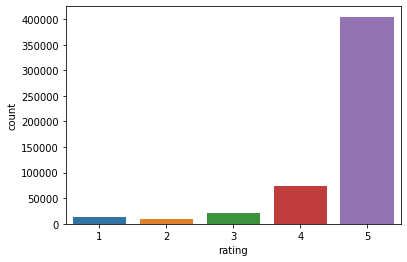

In [ ]:
sns.countplot(x='rating', data=df);

In [ ]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 521402 entries, 0 to 521401
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   hotel_name      521402 non-null  object
 1   review          521402 non-null  object
 2   rating          521402 non-null  int64 
 3   precautions     360439 non-null  object
 4   amenities       520702 non-null  object
 5   date_of_stay    521314 non-null  object
 6   trip_type       329633 non-null  object
 7   room_features   516696 non-null  object
 8   room_types      500604 non-null  object
 9   price_range     521402 non-null  object
 10  location        515468 non-null  object
 11  review_heading  521390 non-null  object
 12  cleaned_review  521402 non-null  object
dtypes: int64(1), object(12)
memory usage: 1.3 GB


## date

In [ ]:
df[df.date_of_stay.isna()]

,hotel_name,review,rating,precautions,amenities,date_of_stay,trip_type,room_features,room_types,price_range,location,review_heading,cleaned_review
5422,"The Leela Ambience Convention Hotel, Delhi",Leea Ambiance Hotel is beautiful place I had a...,5,All linens sanitized in high-temperature wash\...,Free parking\nFree internet\nPool\nFitness Cen...,NaN,NaN,Allergy-free room\nBlackout curtains\nAir cond...,Bridal suite\nNon-smoking rooms\nSuites\nFamil...,"₹ 5,498 - ₹ 11,215",New Delhi,Memorable Experience,hotel beautiful place wonderful experience sta...
18624,The Chancery Pavilion,We visited the hotel with family on 17th Augus...,5,NaN,Free parking\nFree High Speed Internet (WiFi)\...,NaN,NaN,Air conditioning\nHousekeeping\nRoom service\n...,Non-smoking rooms\nSuites\nFamily rooms\nSmoki...,"₹4,434 - ₹7,268",Bengaluru,Amazing Hotel excellent staff,visit hotel family 17th august 2019 reach 11 d...
28180,"Trident, Bandra Kurla, Mumbai",The hotel is conveniently located near the air...,5,All linens sanitized in high-temperature wash\...,Free parking\nFree High Speed Internet (WiFi)\...,NaN,Travelled on business,Allergy-free room\nSoundproof rooms\nAir condi...,Non-smoking rooms\nSuites\nFamily rooms\nSmoki...,"₹7,572 - ₹15,582",Mumbai,Trident BKC,hotel conveniently locate near airport take 20...
55357,Park Avenue Hotel,iam praveen from bombay last month staying in ...,5,NaN,Free parking\nFree High Speed Internet (WiFi)\...,NaN,NaN,Air conditioning\nRoom service\nFlatscreen TV,Non-smoking rooms\nSuites,"₹2,397 - ₹3,268",Chennai,clean and comfort,last month stay hotel park avenue family spaci...
74023,Souvenir Peppermint Hotel,i visits hotel Peppermint Jaipur recently and ...,5,All linens sanitized in high-temperature wash\...,Free parking\nFree High Speed Internet (WiFi)\...,NaN,NaN,Air conditioning\nDesk\nRoom service\nSafe\nCo...,Non-smoking rooms\nSuites\nFamily rooms,"₹1,929 - ₹10,312",Jaipur,/\/ l c e property & excellant Food,visit hotel peppermint recently memorable visi...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
506775,Majorda Beach Resort,it's a beautiful hotel with many activities li...,4,NaN,Free parking\nPaid internet\nPool\nFitness Cen...,NaN,NaN,Air conditioning\nPrivate beach\nRoom service\...,NaN,"₹3,636 - ₹22,258",Majorda,it's a beautiful hotel with many...,beautiful hotel many activity like
506837,Majorda Beach Resort,How to begin ??? arriving at this wonderful re...,5,NaN,Free parking\nPaid internet\nPool\nFitness Cen...,NaN,NaN,Air conditioning\nPrivate beach\nRoom service\...,NaN,"₹3,636 - ₹22,258",Majorda,Paradise found,begin arrive wonderful pleasant last couple bu...
508458,Trident Udaipur,Warm welcome by the front desk and best place ...,5,All linens sanitised in high-temperature wash\...,Free parking\nFree internet\nPool\nFitness Cen...,NaN,NaN,Allergy-free room\nBlackout curtains\nDesk\nHo...,Mountain view\nLandmark view\nPool view\nBrida...,"₹6,551 - ₹15,706",Udaipur,Relaxing,warm welcome front desk best place relax place...
508459,Trident Udaipur,Its is one of the finest hotel in udaipur and ...,5,All linens sanitised in high-temperature wash\...,Free parking\nFree internet\nPool\nFitness Cen...,NaN,NaN,Allergy-free room\nBlackout curtains\nDesk\nHo...,Mountain view\nLandmark view\nPool view\nBrida...,"₹6,551 - ₹15,706",Udaipur,Very pleasant and comfortable stay,one fine hotel know reason service first clean...


only 88 rows will missing dates, hence it would be resonalble to assume that they fall in the vicinity of reviews immediately before/after them

In [ ]:
dates = df.date_of_stay.to_numpy()

In [ ]:
dates[[np.argwhere(dates!=dates)]]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  """Entry point for launching an IPython kernel.


array([[nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
      

In [ ]:
dates=dates.astype(str)

In [ ]:
dates[[np.argwhere(dates=='nan')]] = 'Not Available'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  """Entry point for launching an IPython kernel.


In [ ]:
dates_new = np.array(np.char.split(dates.astype(str)))

In [ ]:
dates_new[5422]

['Not', 'Available']

In [ ]:
dates_new

array([list(['February', '2021']), list(['March', '2021']),
       list(['February', '2020']), ..., list(['January', '2020']),
       list(['May', '2018']), list(['January', '2018'])], dtype=object)

In [ ]:
months = []
years = []

for i in range(len(dates_new)):
    years.append(dates_new[i][1])
    months.append(dates_new[i][0])

In [ ]:
df['Month'] = months

In [ ]:
df['Year'] = years

In [ ]:
df.drop('date_of_stay', axis=1, inplace=True)

In [ ]:
df

,hotel_name,review,rating,precautions,amenities,trip_type,room_features,room_types,price_range,location,review_heading,cleaned_review,Month,Year
0,Svelte Hotel and Personal Suites,Decided to stay in the hotel to celebrate a fr...,5,NaN,Free parking\nWifi\nPool\nFitness Centre with ...,Travelled with friends,Air conditioning\nHousekeeping\nRoom service\n...,Non-smoking rooms\nSuites,"₹ 6,396 - ₹ 9,231",New Delhi,Good Hotel,decide stay hotel celebrate friend birthday re...,February,2021
1,Svelte Hotel and Personal Suites,"Nice Hotel , Room Size was very good , Mu room...",4,NaN,Free parking\nWifi\nPool\nFitness Centre with ...,Travelled on business,Air conditioning\nHousekeeping\nRoom service\n...,Non-smoking rooms\nSuites,"₹ 6,396 - ₹ 9,231",New Delhi,Visit - 21st March,nice hotel room size good mu room 404 request ...,March,2021
2,Svelte Hotel and Personal Suites,Well clearly this hotel didn't stand close to ...,1,NaN,Free parking\nWifi\nPool\nFitness Centre with ...,NaN,Air conditioning\nHousekeeping\nRoom service\n...,Non-smoking rooms\nSuites,"₹ 6,396 - ₹ 9,231",New Delhi,Not Worth In Anyway,well clearly hotel stand close speak even mana...,February,2020
3,Svelte Hotel and Personal Suites,Average hotel with a great locational plus poi...,3,NaN,Free parking\nWifi\nPool\nFitness Centre with ...,NaN,Air conditioning\nHousekeeping\nRoom service\n...,Non-smoking rooms\nSuites,"₹ 6,396 - ₹ 9,231",New Delhi,Mediocre place,average hotel great locational plus point room...,February,2020
4,Svelte Hotel and Personal Suites,They are good but sometimes they act as 2 star...,3,NaN,Free parking\nWifi\nPool\nFitness Centre with ...,Travelled on business,Air conditioning\nHousekeeping\nRoom service\n...,Non-smoking rooms\nSuites,"₹ 6,396 - ₹ 9,231",New Delhi,Behviour,good sometimes act 2 star property frequently ...,February,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
521397,"Red Fox Hotel, Bhiwadi",It was indeed pleasurable stay at Red Fox Bhiw...,4,All linens sanitised in high-temperature wash\...,Free parking\nFree High Speed Internet (WiFi)\...,NaN,Air conditioning\nDesk\nFireplace\nRoom servic...,Non-smoking rooms\nSuites\nFamily rooms,"₹2,456 - ₹4,541",Bhiwadi,Pleasant stay at Red Fox Bhiwadi,indeed pleasurable stay red fox exterior need ...,February,2019
521398,Matsya Vilas,"Place where u can fell the nature, location is...",5,NaN,Free parking\nFree internet\nPool\nFree breakf...,NaN,Bathrobes\nAir conditioning\nDesk\nHousekeepin...,Non-smoking rooms\nFamily rooms,"₹3,858 - ₹5,936",Mandawa,Rejuvenating Nature,place fell nature location nice beautiful hote...,February,2020
521399,Matsya Vilas,Our family stayed two nights here in two bedro...,3,NaN,Free parking\nFree internet\nPool\nFree breakf...,NaN,Bathrobes\nAir conditioning\nDesk\nHousekeepin...,Non-smoking rooms\nFamily rooms,"₹3,858 - ₹5,936",Mandawa,Cold in January,family stay two night two hotel situate 5km to...,January,2020
521400,Matsya Vilas,A comfortable hotel with nice room and grounds...,3,NaN,Free parking\nFree internet\nPool\nFree breakf...,NaN,Bathrobes\nAir conditioning\nDesk\nHousekeepin...,Non-smoking rooms\nFamily rooms,"₹3,858 - ₹5,936",Mandawa,"Nice hotel, but no beer!",comfortable hotel nice room grounds food good ...,May,2018


In [ ]:
months_np = np.array(months)
years_np = np.array(years)

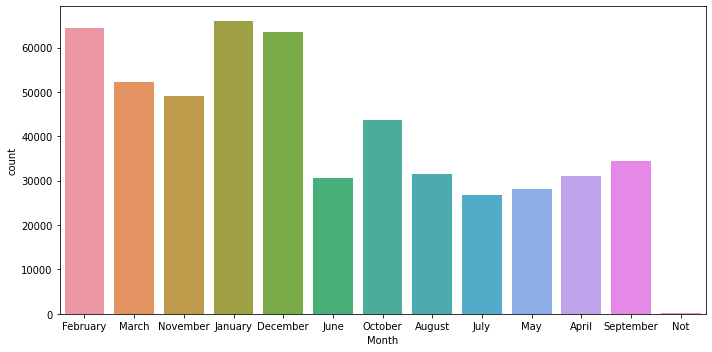

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x=df.Month)
plt.tight_layout()

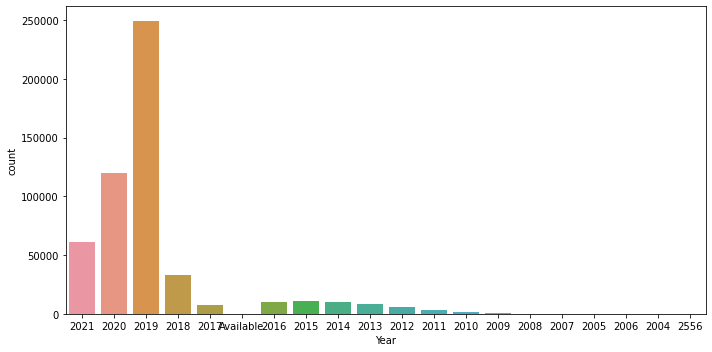

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x=df.Year)
plt.tight_layout()

In [ ]:
df[df['Year'] == '2556']

,hotel_name,review,rating,precautions,amenities,trip_type,room_features,room_types,price_range,location,review_heading,cleaned_review,Month,Year


In [ ]:
i = 329043
df.iloc[i, -2] = df.iloc[i-1, -2]
df.iloc[i, -1] = df.iloc[i-1, -1]

In [ ]:
months_np[np.argwhere(months_np=='Not')]

array([['Not'],
       ['Not'],
       ['Not'],
       ['Not'],
       ['Not'],
       ['Not'],
       ['Not'],
       ['Not'],
       ['Not'],
       ['Not'],
       ['Not'],
       ['Not'],
       ['Not'],
       ['Not'],
       ['Not'],
       ['Not'],
       ['Not'],
       ['Not'],
       ['Not'],
       ['Not'],
       ['Not'],
       ['Not'],
       ['Not'],
       ['Not'],
       ['Not'],
       ['Not'],
       ['Not'],
       ['Not'],
       ['Not'],
       ['Not'],
       ['Not'],
       ['Not'],
       ['Not'],
       ['Not'],
       ['Not'],
       ['Not'],
       ['Not'],
       ['Not'],
       ['Not'],
       ['Not'],
       ['Not'],
       ['Not'],
       ['Not'],
       ['Not'],
       ['Not'],
       ['Not'],
       ['Not'],
       ['Not'],
       ['Not'],
       ['Not'],
       ['Not'],
       ['Not'],
       ['Not'],
       ['Not'],
       ['Not'],
       ['Not'],
       ['Not'],
       ['Not'],
       ['Not'],
       ['Not'],
       ['Not'],
       ['Not'],
       [

In [ ]:
months_np[np.argwhere(months_np=='Not')-1]

array([['January'],
       ['August'],
       ['March'],
       ['August'],
       ['October'],
       ['June'],
       ['November'],
       ['March'],
       ['January'],
       ['June'],
       ['May'],
       ['April'],
       ['January'],
       ['December'],
       ['March'],
       ['July'],
       ['April'],
       ['May'],
       ['January'],
       ['August'],
       ['February'],
       ['January'],
       ['September'],
       ['January'],
       ['April'],
       ['April'],
       ['December'],
       ['January'],
       ['September'],
       ['September'],
       ['April'],
       ['September'],
       ['December'],
       ['February'],
       ['August'],
       ['June'],
       ['January'],
       ['Not'],
       ['Not'],
       ['December'],
       ['October'],
       ['April'],
       ['January'],
       ['May'],
       ['August'],
       ['April'],
       ['January'],
       ['March'],
       ['November'],
       ['February'],
       ['May'],
       ['November'],
     

In [ ]:
months_np[np.argwhere(months_np=='Not')] = months_np[np.argwhere(months_np=='Not')-1]
years_np[np.argwhere(years_np=='Available')] = years_np[np.argwhere(years_np=='Available')-1]

In [ ]:
df.Month = months_np
df.Year = years_np

In [ ]:
np.argwhere(years_np=='Available')

array([[199179],
       [199180],
       [508459],
       [508460]])

In [ ]:
np.argwhere(months_np=='Not')

array([[199179],
       [199180],
       [508459],
       [508460]])

In [ ]:
df.columns

Index(['hotel_name', 'review', 'rating', 'precautions', 'amenities',
       'trip_type', 'room_features', 'room_types', 'price_range', 'location',
       'review_heading', 'cleaned_review', 'Month', 'Year'],
      dtype='object')

In [ ]:
for i in [199179, 199180, 508459, 508460]:
  df.iloc[i, -2] = df.iloc[i-1, -2]
  df.iloc[i, -1] = df.iloc[i-1, -1]

In [ ]:
df.isna().sum()

hotel_name             0
review                 0
rating                 0
precautions       160963
amenities            700
trip_type         191769
room_features       4706
room_types         20798
price_range            0
location            5934
review_heading        12
cleaned_review         0
Month                  0
Year                   0
dtype: int64

In [ ]:
df.Year = df.Year.astype(int)

In [ ]:
df.Month.value_counts()

January      65997
February     64394
December     63535
March        52346
November     48997
October      43727
September    34405
August       31408
April        31038
June         30612
May          28127
July         26816
Name: Month, dtype: int64

In [ ]:
pd.to_datetime(['{}-{}-01'.format(y, m) for y, m in zip(df.Year, df.Month)])

DatetimeIndex(['2021-02-01', '2021-03-01', '2020-02-01', '2020-02-01',
               '2020-02-01', '2019-11-01', '2020-01-01', '2019-12-01',
               '2020-01-01', '2020-01-01',
               ...
               '2019-04-01', '2019-04-01', '2019-03-01', '2019-02-01',
               '2019-02-01', '2019-02-01', '2020-02-01', '2020-01-01',
               '2018-05-01', '2018-01-01'],
              dtype='datetime64[ns]', length=521402, freq=None)

In [ ]:
df['Date'] = pd.to_datetime(['{}-{}-01'.format(y, m) for y, m in zip(df.Year, df.Month)])

In [ ]:
df.head()

,hotel_name,review,rating,precautions,amenities,trip_type,room_features,room_types,price_range,location,review_heading,Month,Year,Date
0,Svelte Hotel and Personal Suites,Decided to stay in the hotel to celebrate a fr...,5,NaN,Free parking\nWifi\nPool\nFitness Centre with ...,Travelled with friends,Air conditioning\nHousekeeping\nRoom service\n...,Non-smoking rooms\nSuites,"₹ 6,396 - ₹ 9,231",New Delhi,Good Hotel,February,2021,2021-02-01
1,Svelte Hotel and Personal Suites,"Nice Hotel , Room Size was very good , Mu room...",4,NaN,Free parking\nWifi\nPool\nFitness Centre with ...,Travelled on business,Air conditioning\nHousekeeping\nRoom service\n...,Non-smoking rooms\nSuites,"₹ 6,396 - ₹ 9,231",New Delhi,Visit - 21st March,March,2021,2021-03-01
2,Svelte Hotel and Personal Suites,Well clearly this hotel didn't stand close to ...,1,NaN,Free parking\nWifi\nPool\nFitness Centre with ...,NaN,Air conditioning\nHousekeeping\nRoom service\n...,Non-smoking rooms\nSuites,"₹ 6,396 - ₹ 9,231",New Delhi,Not Worth In Anyway,February,2020,2020-02-01
3,Svelte Hotel and Personal Suites,Average hotel with a great locational plus poi...,3,NaN,Free parking\nWifi\nPool\nFitness Centre with ...,NaN,Air conditioning\nHousekeeping\nRoom service\n...,Non-smoking rooms\nSuites,"₹ 6,396 - ₹ 9,231",New Delhi,Mediocre place,February,2020,2020-02-01
4,Svelte Hotel and Personal Suites,They are good but sometimes they act as 2 star...,3,NaN,Free parking\nWifi\nPool\nFitness Centre with ...,Travelled on business,Air conditioning\nHousekeeping\nRoom service\n...,Non-smoking rooms\nSuites,"₹ 6,396 - ₹ 9,231",New Delhi,Behviour,February,2020,2020-02-01


In [ ]:
df.Date = pd.to_datetime(df.Date)

In [ ]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 521402 entries, 0 to 521401
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   hotel_name      521402 non-null  object        
 1   review          521402 non-null  object        
 2   rating          521402 non-null  int64         
 3   precautions     360439 non-null  object        
 4   amenities       520702 non-null  object        
 5   trip_type       329633 non-null  object        
 6   room_features   516696 non-null  object        
 7   room_types      500604 non-null  object        
 8   price_range     521402 non-null  object        
 9   location        515468 non-null  object        
 10  review_heading  521390 non-null  object        
 11  cleaned_review  521402 non-null  object        
 12  Month           521402 non-null  object        
 13  Year            521402 non-null  int64         
 14  Date            521402 non-null  dat

## trip type

In [ ]:
df.trip_type.value_counts()

Travelled with family     120530
Travelled on business      85312
Travelled as a couple      59023
Travelled with friends     46563
Travelled solo             18205
Name: trip_type, dtype: int64

In [ ]:
df[df.trip_type.isna()]

,hotel_name,review,rating,precautions,amenities,trip_type,room_features,room_types,location,review_heading,cleaned_review,Month,Year,Date,price_low,price_high
2,Svelte Hotel and Personal Suites,Well clearly this hotel didn't stand close to ...,1,NaN,Free parking\nWifi\nPool\nFitness Centre with ...,NaN,Air conditioning\nHousekeeping\nRoom service\n...,Non-smoking rooms\nSuites,New Delhi,Not Worth In Anyway,well clearly hotel stand close speak even mana...,February,2020,2020-02-01,6396,9231
3,Svelte Hotel and Personal Suites,Average hotel with a great locational plus poi...,3,NaN,Free parking\nWifi\nPool\nFitness Centre with ...,NaN,Air conditioning\nHousekeeping\nRoom service\n...,Non-smoking rooms\nSuites,New Delhi,Mediocre place,average hotel great locational plus point room...,February,2020,2020-02-01,6396,9231
8,Svelte Hotel and Personal Suites,the very worst Hotel EVER! we requested 3 Supe...,1,NaN,Free parking\nWifi\nPool\nFitness Centre with ...,NaN,Air conditioning\nHousekeeping\nRoom service\n...,Non-smoking rooms\nSuites,New Delhi,disgusting place DO NOT STAY HERE!!! Waste of ...,bad hotel ever request 3 superior sept 2019 te...,January,2020,2020-01-01,6396,9231
12,Svelte Hotel and Personal Suites,We booked 4 suites for 1 night .The suite was ...,3,NaN,Free parking\nWifi\nPool\nFitness Centre with ...,NaN,Air conditioning\nHousekeeping\nRoom service\n...,Non-smoking rooms\nSuites,New Delhi,AVERAGE,book 4 suite 1 night suite spacious equip kitc...,November,2019,2019-11-01,6396,9231
13,Svelte Hotel and Personal Suites,I am a long-term guest here. The longer I stay...,5,NaN,Free parking\nWifi\nPool\nFitness Centre with ...,NaN,Air conditioning\nHousekeeping\nRoom service\n...,Non-smoking rooms\nSuites,New Delhi,thank you,guest longer stay like feel totally comfortabl...,June,2019,2019-06-01,6396,9231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
521397,"Red Fox Hotel, Bhiwadi",It was indeed pleasurable stay at Red Fox Bhiw...,4,All linens sanitised in high-temperature wash\...,Free parking\nFree High Speed Internet (WiFi)\...,NaN,Air conditioning\nDesk\nFireplace\nRoom servic...,Non-smoking rooms\nSuites\nFamily rooms,Bhiwadi,Pleasant stay at Red Fox Bhiwadi,indeed pleasurable stay red fox exterior need ...,February,2019,2019-02-01,2456,4541
521398,Matsya Vilas,"Place where u can fell the nature, location is...",5,NaN,Free parking\nFree internet\nPool\nFree breakf...,NaN,Bathrobes\nAir conditioning\nDesk\nHousekeepin...,Non-smoking rooms\nFamily rooms,Mandawa,Rejuvenating Nature,place fell nature location nice beautiful hote...,February,2020,2020-02-01,3858,5936
521399,Matsya Vilas,Our family stayed two nights here in two bedro...,3,NaN,Free parking\nFree internet\nPool\nFree breakf...,NaN,Bathrobes\nAir conditioning\nDesk\nHousekeepin...,Non-smoking rooms\nFamily rooms,Mandawa,Cold in January,family stay two night two hotel situate 5km to...,January,2020,2020-01-01,3858,5936
521400,Matsya Vilas,A comfortable hotel with nice room and grounds...,3,NaN,Free parking\nFree internet\nPool\nFree breakf...,NaN,Bathrobes\nAir conditioning\nDesk\nHousekeepin...,Non-smoking rooms\nFamily rooms,Mandawa,"Nice hotel, but no beer!",comfortable hotel nice room grounds food good ...,May,2018,2018-05-01,3858,5936


In [ ]:
trip_type = np.array(df.trip_type)

In [ ]:
trip_type_new = np.array(np.char.split(trip_type.astype(str)))

In [ ]:
type_ = []

for i in range(len(trip_type_new)):
    type_.append(trip_type_new[i][-1])

In [ ]:
type_

['friends',
 'business',
 'nan',
 'nan',
 'business',
 'family',
 'business',
 'couple',
 'nan',
 'family',
 'solo',
 'family',
 'nan',
 'nan',
 'solo',
 'family',
 'couple',
 'solo',
 'business',
 'nan',
 'nan',
 'couple',
 'couple',
 'family',
 'business',
 'nan',
 'business',
 'family',
 'family',
 'business',
 'nan',
 'business',
 'family',
 'family',
 'family',
 'business',
 'business',
 'couple',
 'couple',
 'couple',
 'couple',
 'family',
 'family',
 'family',
 'couple',
 'business',
 'couple',
 'family',
 'business',
 'business',
 'business',
 'family',
 'family',
 'business',
 'family',
 'business',
 'family',
 'family',
 'family',
 'business',
 'business',
 'family',
 'family',
 'business',
 'business',
 'nan',
 'friends',
 'couple',
 'business',
 'business',
 'business',
 'family',
 'business',
 'business',
 'business',
 'nan',
 'family',
 'business',
 'couple',
 'couple',
 'nan',
 'solo',
 'solo',
 'solo',
 'family',
 'solo',
 'couple',
 'family',
 'family',
 'family',
 'so

In [ ]:
df.trip_type = type_

In [ ]:
df.trip_type.value_counts()

nan         191769
family      120530
business     85312
couple       59023
friends      46563
solo         18205
Name: trip_type, dtype: int64

In [ ]:
df.head()

,hotel_name,review,rating,precautions,amenities,trip_type,room_features,room_types,location,review_heading,cleaned_review,Month,Year,Date,price_low,price_high
0,Svelte Hotel and Personal Suites,Decided to stay in the hotel to celebrate a fr...,5,NaN,Free parking\nWifi\nPool\nFitness Centre with ...,friends,Air conditioning\nHousekeeping\nRoom service\n...,Non-smoking rooms\nSuites,New Delhi,Good Hotel,decide stay hotel celebrate friend birthday re...,February,2021,2021-02-01,6396,9231
1,Svelte Hotel and Personal Suites,"Nice Hotel , Room Size was very good , Mu room...",4,NaN,Free parking\nWifi\nPool\nFitness Centre with ...,business,Air conditioning\nHousekeeping\nRoom service\n...,Non-smoking rooms\nSuites,New Delhi,Visit - 21st March,nice hotel room size good mu room 404 request ...,March,2021,2021-03-01,6396,9231
2,Svelte Hotel and Personal Suites,Well clearly this hotel didn't stand close to ...,1,NaN,Free parking\nWifi\nPool\nFitness Centre with ...,nan,Air conditioning\nHousekeeping\nRoom service\n...,Non-smoking rooms\nSuites,New Delhi,Not Worth In Anyway,well clearly hotel stand close speak even mana...,February,2020,2020-02-01,6396,9231
3,Svelte Hotel and Personal Suites,Average hotel with a great locational plus poi...,3,NaN,Free parking\nWifi\nPool\nFitness Centre with ...,nan,Air conditioning\nHousekeeping\nRoom service\n...,Non-smoking rooms\nSuites,New Delhi,Mediocre place,average hotel great locational plus point room...,February,2020,2020-02-01,6396,9231
4,Svelte Hotel and Personal Suites,They are good but sometimes they act as 2 star...,3,NaN,Free parking\nWifi\nPool\nFitness Centre with ...,business,Air conditioning\nHousekeeping\nRoom service\n...,Non-smoking rooms\nSuites,New Delhi,Behviour,good sometimes act 2 star property frequently ...,February,2020,2020-02-01,6396,9231


In [ ]:
df = pd.get_dummies(df, columns=['trip_type'], prefix='', prefix_sep='')

In [ ]:
df.head()

,hotel_name,review,rating,precautions,amenities,room_features,room_types,price_range,location,review_heading,Month,Year,Date,cleaned_review,business,couple,family,friends,solo
0,Svelte Hotel and Personal Suites,Decided to stay in the hotel to celebrate a fr...,5,NaN,Free parking\nWifi\nPool\nFitness Centre with ...,Air conditioning\nHousekeeping\nRoom service\n...,Non-smoking rooms\nSuites,"₹ 6,396 - ₹ 9,231",New Delhi,Good Hotel,February,2021,2021-02-01,decide stay hotel celebrate friend birthday re...,0,0,0,1,0
1,Svelte Hotel and Personal Suites,"Nice Hotel , Room Size was very good , Mu room...",4,NaN,Free parking\nWifi\nPool\nFitness Centre with ...,Air conditioning\nHousekeeping\nRoom service\n...,Non-smoking rooms\nSuites,"₹ 6,396 - ₹ 9,231",New Delhi,Visit - 21st March,March,2021,2021-03-01,nice hotel room size good mu room 404 request ...,1,0,0,0,0
2,Svelte Hotel and Personal Suites,Well clearly this hotel didn't stand close to ...,1,NaN,Free parking\nWifi\nPool\nFitness Centre with ...,Air conditioning\nHousekeeping\nRoom service\n...,Non-smoking rooms\nSuites,"₹ 6,396 - ₹ 9,231",New Delhi,Not Worth In Anyway,February,2020,2020-02-01,well clearly hotel stand close speak even mana...,0,0,0,0,0
3,Svelte Hotel and Personal Suites,Average hotel with a great locational plus poi...,3,NaN,Free parking\nWifi\nPool\nFitness Centre with ...,Air conditioning\nHousekeeping\nRoom service\n...,Non-smoking rooms\nSuites,"₹ 6,396 - ₹ 9,231",New Delhi,Mediocre place,February,2020,2020-02-01,average hotel great locational plus point room...,0,0,0,0,0
4,Svelte Hotel and Personal Suites,They are good but sometimes they act as 2 star...,3,NaN,Free parking\nWifi\nPool\nFitness Centre with ...,Air conditioning\nHousekeeping\nRoom service\n...,Non-smoking rooms\nSuites,"₹ 6,396 - ₹ 9,231",New Delhi,Behviour,February,2020,2020-02-01,good sometimes act 2 star property frequently ...,1,0,0,0,0


## price range

In [ ]:
df.price_range = df.price_range.str.replace('[^\w\s]', '').str.lstrip().str.rstrip().str.split()

In [ ]:
df.price_range

0         [6396, 9231]
1         [6396, 9231]
2         [6396, 9231]
3         [6396, 9231]
4         [6396, 9231]
              ...     
521397    [2456, 4541]
521398    [3858, 5936]
521399    [3858, 5936]
521400    [3858, 5936]
521401    [3858, 5936]
Name: price_range, Length: 521402, dtype: object

In [ ]:
df.price_range[0]

['6396', '9231']

In [ ]:
a=0
for i in df.price_range:
  if(len(i)<2):
   a+=1

print(a)

235


In [ ]:
low=[]
high=[]

for i in df.price_range:

  if(len(i)==2):
    low.append(i[0])
    high.append(i[1])

  else:
    low.append('0')
    high.append('0')

In [ ]:
a=[]
for i in range(len(low)):
  if(len(low[i])>5):
    a.append(i)

In [ ]:
df.iloc[123123].hotel_name

'Marriott Suites Pune'

In [ ]:
hotels=[]
for i in a:
  hotels.append(df.loc[i].hotel_name)

In [ ]:
set(hotels)

{'Alleppey 3 Palms Guesthouse',
 'Atithi Parinay Homestay',
 'Badal House Khuri',
 'Bananki Homestay',
 'Bera Safari Lodge',
 'Best Western Plus Jalandhar',
 'Bynekaadu',
 'Club Mahindra Manipur Villa, Binsar',
 'Coffee Valley Homestay',
 'Coffeebean Home Stay Chikmagalur',
 'Devpur Homestay Kutch',
 'Ezhara Beach House',
 'Farm of Happiness Agro Tourism Homestay',
 'Ganga Resort Homely Stay',
 'Gubbachi Goodu Home Stay',
 'Hidden Forest Retreat',
 'Hide Out',
 'Hill & Sea View Beach Resort',
 'Hotel Udayee International',
 'Il Palazzo Hotel',
 'Kaanana Home Stay',
 'Kadumakki Resorts',
 'Kolavara Heritage Homestay',
 'MTDC Holiday Resort Bhandardara',
 'MTDC Holiday Resort Tadoba',
 'Mango Hotels, Secunderabad - MG Road',
 'Marari Sea Lap Villas',
 'Nirvana Naturopathy & Retreat',
 'Nyrit Villa Homestay',
 'Prospect Hotel',
 'Sakha Niwas Agro Tourism',
 'Seashell Haris Beach Home',
 'Serene Ravine Homestay',
 'Sitaram Beach Retreat',
 'T24 Retro',
 'The Padmini Haveli',
 'The Palace L

In [ ]:
df['price_low'] = low
df['price_high'] = high

In [ ]:
for i in set(hotels):
  print(df.loc[df.hotel_name==i].index)
  print('\n')

Int64Index([354314, 354315, 354316, 354317, 354318, 354319, 354320, 354321,
            354322, 354323,
            ...
            354453, 354454, 354455, 354456, 354457, 354458, 354459, 354460,
            354461, 354462],
           dtype='int64', length=149)


Int64Index([382770, 382771, 382772, 382773, 382774, 382775, 382776, 382777,
            382778, 382779, 382780, 382781, 382782, 382783, 382784, 382785,
            382786, 382787, 382788, 382789, 382790, 382791, 382792, 382793,
            382794, 382795, 382796, 382797, 382798, 382799, 382800, 382801,
            382802, 382803, 382804, 382805, 382806, 382807, 382808, 382809,
            382810, 382811, 382812, 382813, 382814, 382815, 382816, 382817,
            382818, 382819, 382820, 382821, 382822, 382823, 382824, 382825,
            382826, 382827, 382828, 382829, 382830, 382831, 382832, 382833,
            382834],
           dtype='int64')


Int64Index([345001, 345002, 345003, 345004, 345005, 345006, 345007, 345008,
  

In [ ]:
df.loc[df.price_low=='Transit'].index

Int64Index([45316, 45317, 45318, 45319, 45320, 45321, 45322, 45323, 45324,
            45325, 45326, 45327, 45328, 45329, 45330, 45331, 45332, 45333,
            45334, 45335, 45336, 45337, 45338, 45339, 45340, 45341, 45342,
            45343, 45344, 45345, 45346, 45347, 45348, 45349, 45350, 45351,
            45352, 45353, 45354, 45355, 45356, 45357, 45358, 45359, 45360],
           dtype='int64')

In [ ]:
df.iloc[319389]

hotel_name                                                Bynekaadu
review            Our stay in Bynekaadu resort was an excellent ...
rating                                                            5
precautions                                                     NaN
amenities         Free parking\nFree breakfast\nRestaurant\nBrea...
trip_type                                                    family
room_features                                         Flatscreen TV
room_types                                             Family rooms
price_range          [IndiaKarnatakaChikkamagaluru, DistrictKalasa]
location                                                     Kalasa
review_heading                               Great stay @ Bynekaadu
Month                                                         April
Year                                                           2021
Date                                                     2021-04-01
price_low                              IndiaKarn

In [ ]:
df.loc[45316:45360, 'price_low'] = 2547
df.loc[45316:45360, 'price_high'] = 3225

In [ ]:
df.iloc[377828]

hotel_name                                    Marari Sea Lap Villas
review            Marari Sea Lap Villas - a place that surprises...
rating                                                            5
precautions                                                     NaN
amenities         Free parking\nFree High Speed Internet (WiFi)\...
trip_type                                                       NaN
room_features     Air conditioning\nRoom service\nComplimentary ...
room_types                                               Ocean view
price_range             [IndiaKeralaAlappuzha, DistrictMararikulam]
location                                                Mararikulam
review_heading                                Paradise on the beach
Month                                                       January
Year                                                           2021
Date                                                     2021-01-01
price_low                                      I

In [ ]:
df.iloc[316420]

hotel_name                     Mango Hotels, Secunderabad - MG Road
review            Iam regular traveler of the secunderabad. It i...
rating                                                            4
precautions                                                     NaN
amenities         Free parking\nFree High Speed Internet (WiFi)\...
trip_type                                                    couple
room_features     Air conditioning\nDesk\nHousekeeping\nRoom ser...
room_types                                     Suites\nFamily rooms
price_range         [IndiaTelanganaHyderabad, DistrictSecunderabad]
location                                               Secunderabad
review_heading                                             Business
Month                                                      December
Year                                                           2019
Date                                                     2019-12-01
price_low                                   Indi

In [ ]:
df.iloc[377828]

In [ ]:
df.iloc[377828]

In [ ]:
df.iloc[377828]

In [ ]:
df.iloc[377828]

In [ ]:
df.iloc[377828]

In [ ]:
indices=[]
for i in set(hotels):
  indices.append( ( np.asarray( df[df.hotel_name==i].index ) ) )

In [ ]:
indices

[array([354314, 354315, 354316, 354317, 354318, 354319, 354320, 354321,
        354322, 354323, 354324, 354325, 354326, 354327, 354328, 354329,
        354330, 354331, 354332, 354333, 354334, 354335, 354336, 354337,
        354338, 354339, 354340, 354341, 354342, 354343, 354344, 354345,
        354346, 354347, 354348, 354349, 354350, 354351, 354352, 354353,
        354354, 354355, 354356, 354357, 354358, 354359, 354360, 354361,
        354362, 354363, 354364, 354365, 354366, 354367, 354368, 354369,
        354370, 354371, 354372, 354373, 354374, 354375, 354376, 354377,
        354378, 354379, 354380, 354381, 354382, 354383, 354384, 354385,
        354386, 354387, 354388, 354389, 354390, 354391, 354392, 354393,
        354394, 354395, 354396, 354397, 354398, 354399, 354400, 354401,
        354402, 354403, 354404, 354405, 354406, 354407, 354408, 354409,
        354410, 354411, 354412, 354413, 354414, 354415, 354416, 354417,
        354418, 354419, 354420, 354421, 354422, 354423, 354424, 

In [ ]:
indices[0][-1]

319443

In [ ]:
for i in indices:
  df.loc[ i[0] : i[-1], 'price_low']=0
  df.loc[ i[0] : i[-1], 'price_high']=0

In [ ]:
df.price_low = df.price_low.astype(int)
df.price_high = df.price_high.astype(int)

In [ ]:
df.head()

,hotel_name,review,rating,precautions,amenities,trip_type,room_features,room_types,price_range,location,review_heading,cleaned_review,Month,Year,Date,price_low,price_high
0,Svelte Hotel and Personal Suites,Decided to stay in the hotel to celebrate a fr...,5,NaN,Free parking\nWifi\nPool\nFitness Centre with ...,Travelled with friends,Air conditioning\nHousekeeping\nRoom service\n...,Non-smoking rooms\nSuites,"[6396, 9231]",New Delhi,Good Hotel,decide stay hotel celebrate friend birthday re...,February,2021,2021-02-01,6396,9231
1,Svelte Hotel and Personal Suites,"Nice Hotel , Room Size was very good , Mu room...",4,NaN,Free parking\nWifi\nPool\nFitness Centre with ...,Travelled on business,Air conditioning\nHousekeeping\nRoom service\n...,Non-smoking rooms\nSuites,"[6396, 9231]",New Delhi,Visit - 21st March,nice hotel room size good mu room 404 request ...,March,2021,2021-03-01,6396,9231
2,Svelte Hotel and Personal Suites,Well clearly this hotel didn't stand close to ...,1,NaN,Free parking\nWifi\nPool\nFitness Centre with ...,NaN,Air conditioning\nHousekeeping\nRoom service\n...,Non-smoking rooms\nSuites,"[6396, 9231]",New Delhi,Not Worth In Anyway,well clearly hotel stand close speak even mana...,February,2020,2020-02-01,6396,9231
3,Svelte Hotel and Personal Suites,Average hotel with a great locational plus poi...,3,NaN,Free parking\nWifi\nPool\nFitness Centre with ...,NaN,Air conditioning\nHousekeeping\nRoom service\n...,Non-smoking rooms\nSuites,"[6396, 9231]",New Delhi,Mediocre place,average hotel great locational plus point room...,February,2020,2020-02-01,6396,9231
4,Svelte Hotel and Personal Suites,They are good but sometimes they act as 2 star...,3,NaN,Free parking\nWifi\nPool\nFitness Centre with ...,Travelled on business,Air conditioning\nHousekeeping\nRoom service\n...,Non-smoking rooms\nSuites,"[6396, 9231]",New Delhi,Behviour,good sometimes act 2 star property frequently ...,February,2020,2020-02-01,6396,9231


In [ ]:
df.drop(columns='price_range', inplace=True)

In [ ]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 521402 entries, 0 to 521401
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   hotel_name      521402 non-null  object        
 1   review          521402 non-null  object        
 2   rating          521402 non-null  int64         
 3   precautions     360439 non-null  object        
 4   amenities       520702 non-null  object        
 5   trip_type       329633 non-null  object        
 6   room_features   516696 non-null  object        
 7   room_types      500604 non-null  object        
 8   location        515468 non-null  object        
 9   review_heading  521390 non-null  object        
 10  cleaned_review  521402 non-null  object        
 11  Month           521402 non-null  object        
 12  Year            521402 non-null  int64         
 13  Date            521402 non-null  datetime64[ns]
 14  price_low       521402 non-null  int

# Fixing amenities, room features and room types

In [ ]:
np.char.splitlines(amenities.astype(str))

array([list(['Free parking', 'Wifi', 'Pool', 'Fitness Centre with Gym / Workout Room', 'Restaurant', 'Airport transportation', 'Business Centre with Internet Access', 'Conference facilities', 'Secured parking', 'Rooftop pool', 'Outdoor pool', 'Personal trainer', 'Breakfast available', 'Breakfast buffet', 'Breakfast in the room', 'Car hire', 'Meeting rooms', '24-hour security', 'Baggage storage', 'Concierge', 'Newspaper', 'Doorperson', '24-hour front desk', 'Dry cleaning', 'Laundry service', 'Ironing service', 'Shoeshine']),
       list(['Free parking', 'Wifi', 'Pool', 'Fitness Centre with Gym / Workout Room', 'Restaurant', 'Airport transportation', 'Business Centre with Internet Access', 'Conference facilities', 'Secured parking', 'Rooftop pool', 'Outdoor pool', 'Personal trainer', 'Breakfast available', 'Breakfast buffet', 'Breakfast in the room', 'Car hire', 'Meeting rooms', '24-hour security', 'Baggage storage', 'Concierge', 'Newspaper', 'Doorperson', '24-hour front desk', 'Dry clea

In [ ]:
def fix_string(array):
    return np.char.replace(array.astype(str), '\n', ', ')

In [ ]:
fix_string(np.array(df.room_features))

array(['Air conditioning, Housekeeping, Room service, Safe, VIP room facilities, Kitchenette, Microwave, Flatscreen TV, Bottled water, Minibar, Refrigerator',
       'Air conditioning, Housekeeping, Room service, Safe, VIP room facilities, Kitchenette, Microwave, Flatscreen TV, Bottled water, Minibar, Refrigerator',
       'Air conditioning, Housekeeping, Room service, Safe, VIP room facilities, Kitchenette, Microwave, Flatscreen TV, Bottled water, Minibar, Refrigerator',
       ...,
       'Air conditioning, Room service, Safe, Minibar, Flatscreen TV',
       'Air conditioning, Room service, Safe, Minibar, Flatscreen TV',
       'Air conditioning, Room service, Safe, Minibar, Flatscreen TV'],
      dtype='<U665')

In [ ]:
fix_string(np.array(df.room_types))

array(['Non-smoking rooms, Suites', 'Non-smoking rooms, Suites',
       'Non-smoking rooms, Suites', ...,
       'Non-smoking rooms, Suites, Family rooms, Smoking rooms available',
       'Non-smoking rooms, Suites, Family rooms, Smoking rooms available',
       'Non-smoking rooms, Suites, Family rooms, Smoking rooms available'],
      dtype='<U126')

In [ ]:
fix_string(np.array(df.amenities))

array(['Free parking, Wifi, Pool, Fitness Centre with Gym / Workout Room, Restaurant, Airport transportation, Business Centre with Internet Access, Conference facilities, Secured parking, Rooftop pool, Outdoor pool, Personal trainer, Breakfast available, Breakfast buffet, Breakfast in the room, Car hire, Meeting rooms, 24-hour security, Baggage storage, Concierge, Newspaper, Doorperson, 24-hour front desk, Dry cleaning, Laundry service, Ironing service, Shoeshine',
       'Free parking, Wifi, Pool, Fitness Centre with Gym / Workout Room, Restaurant, Airport transportation, Business Centre with Internet Access, Conference facilities, Secured parking, Rooftop pool, Outdoor pool, Personal trainer, Breakfast available, Breakfast buffet, Breakfast in the room, Car hire, Meeting rooms, 24-hour security, Baggage storage, Concierge, Newspaper, Doorperson, 24-hour front desk, Dry cleaning, Laundry service, Ironing service, Shoeshine',
       'Free parking, Wifi, Pool, Fitness Centre with Gym / 

In [ ]:
df[df.Date > '2020-03-01'].rating

0         5
1         4
80        5
81        5
82        5
         ..
140538    1
140539    5
140540    5
140541    5
140546    5
Name: rating, Length: 31053, dtype: int64

In [ ]:
ratings_post_covid = np.array(df[df.Date > '2020-03-01'].rating)
ratings_pre_covid = np.array(df[df.Date < '2020-03-01'].rating)

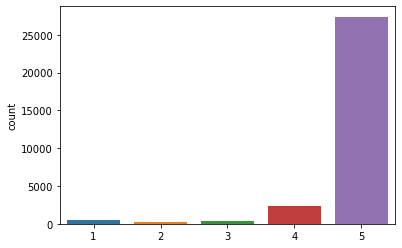

In [ ]:
sns.countplot(ratings_post_covid);

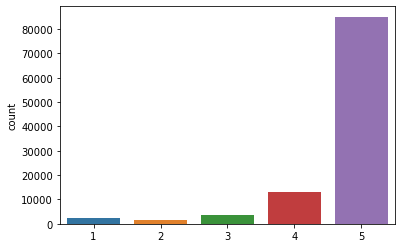

In [ ]:
sns.countplot(ratings_pre_covid);

In [ ]:
np.sum(ratings_post_covid==5)/np.size(ratings_post_covid)*100

88.15573374553183

In [ ]:
np.sum(ratings_pre_covid==5)/np.size(ratings_pre_covid)*100

80.27223727309627

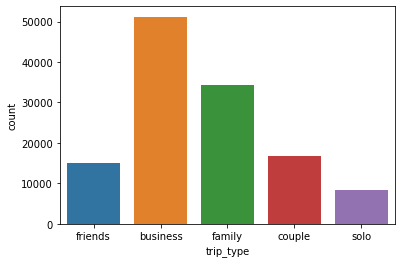

In [ ]:
sns.countplot(df.trip_type);

In [ ]:
trip_type_post_covid = np.array(df[df.Date > '2020-03-01'].trip_type)
trip_type_pre_covid = np.array(df[df.Date < '2020-03-01'].trip_type)

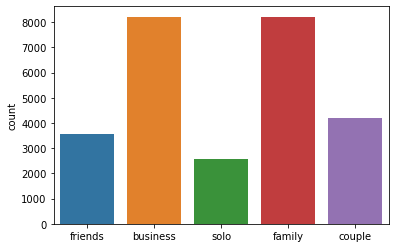

In [ ]:
sns.countplot(trip_type_post_covid);

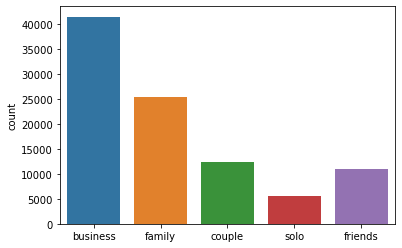

In [ ]:
sns.countplot(trip_type_pre_covid);

In [ ]:
df

,hotel_name,review,rating,precautions,amenities,trip_type,room_features,room_types,price_range,location,review_heading,Month,Year,Date
0,Svelte Hotel and Personal Suites,Decided to stay in the hotel to celebrate a fr...,5,NaN,Free parking\nWifi\nPool\nFitness Centre with ...,friends,Air conditioning\nHousekeeping\nRoom service\n...,Non-smoking rooms\nSuites,"₹ 6,396 - ₹ 9,231",New Delhi,Good Hotel,February,2021,2021-02-01
1,Svelte Hotel and Personal Suites,"Nice Hotel , Room Size was very good , Mu room...",4,NaN,Free parking\nWifi\nPool\nFitness Centre with ...,business,Air conditioning\nHousekeeping\nRoom service\n...,Non-smoking rooms\nSuites,"₹ 6,396 - ₹ 9,231",New Delhi,Visit - 21st March,March,2021,2021-03-01
2,Svelte Hotel and Personal Suites,Well clearly this hotel didn't stand close to ...,1,NaN,Free parking\nWifi\nPool\nFitness Centre with ...,NaN,Air conditioning\nHousekeeping\nRoom service\n...,Non-smoking rooms\nSuites,"₹ 6,396 - ₹ 9,231",New Delhi,Not Worth In Anyway,February,2020,2020-02-01
3,Svelte Hotel and Personal Suites,Average hotel with a great locational plus poi...,3,NaN,Free parking\nWifi\nPool\nFitness Centre with ...,NaN,Air conditioning\nHousekeeping\nRoom service\n...,Non-smoking rooms\nSuites,"₹ 6,396 - ₹ 9,231",New Delhi,Mediocre place,February,2020,2020-02-01
4,Svelte Hotel and Personal Suites,They are good but sometimes they act as 2 star...,3,NaN,Free parking\nWifi\nPool\nFitness Centre with ...,business,Air conditioning\nHousekeeping\nRoom service\n...,Non-smoking rooms\nSuites,"₹ 6,396 - ₹ 9,231",New Delhi,Behviour,February,2020,2020-02-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140983,Regenta Central Antarim,"Please improve your breakfast menu, it's one a...",3,NaN,Free parking\nFree High Speed Internet (WiFi)\...,business,Air conditioning\nRoom service\nSafe\nMinibar\...,Non-smoking rooms\nSuites\nFamily rooms\nSmoki...,"₹2,346 - ₹6,231",Ahmedabad,Prakkash Chaurasia,December,2018,2018-12-01
140984,Regenta Central Antarim,This is a new property with great decor. Its f...,5,NaN,Free parking\nFree High Speed Internet (WiFi)\...,business,Air conditioning\nRoom service\nSafe\nMinibar\...,Non-smoking rooms\nSuites\nFamily rooms\nSmoki...,"₹2,346 - ₹6,231",Ahmedabad,Excellent Hotel. Good value for money.,December,2018,2018-12-01
140985,Regenta Central Antarim,Extremely clean and hygienic rooms and on-poin...,5,NaN,Free parking\nFree High Speed Internet (WiFi)\...,solo,Air conditioning\nRoom service\nSafe\nMinibar\...,Non-smoking rooms\nSuites\nFamily rooms\nSmoki...,"₹2,346 - ₹6,231",Ahmedabad,Great experience,December,2018,2018-12-01
140986,Regenta Central Antarim,Good hospitality and very friendly staff espec...,5,NaN,Free parking\nFree High Speed Internet (WiFi)\...,business,Air conditioning\nRoom service\nSafe\nMinibar\...,Non-smoking rooms\nSuites\nFamily rooms\nSmoki...,"₹2,346 - ₹6,231",Ahmedabad,Amazing hospitality and friendly staff,December,2018,2018-12-01


In [ ]:
price = np.array(df.price_range)

In [ ]:
price = np.char.replace(price.astype(str), '₹', '')

In [ ]:
price = np.char.replace(price.astype(str),',', '')

In [ ]:
price = np.char.replace(price.astype(str), '-', '')

In [ ]:
price = np.char.lstrip(price.astype(str))

In [ ]:
price

array(['6396   9231', '6396   9231', '6396   9231', ..., '2346  6231',
       '2346  6231', '2346  6231'], dtype='<U39')

In [ ]:
np.char.split(price)

array([list(['6396', '9231']), list(['6396', '9231']),
       list(['6396', '9231']), ..., list(['2346', '6231']),
       list(['2346', '6231']), list(['2346', '6231'])], dtype=object)

In [ ]:
def array_of_lists_to_array(arr):
    return np.apply_along_axis(lambda a: np.array(a[0]), -1, arr[..., None])
array_of_lists_to_array(price)

array(['6396   9231', '6396   9231', '6396   9231', ..., '2346  6231',
       '2346  6231', '2346  6231'], dtype='<U11')

In [ ]:
int(price[3000][-4:])

4005

In [ ]:
mean_price = []

for i in range(len(price)):
    #mean_price.append((int(price[i][:4])+int(price[i][-4:]))/2)
    mean_price.append(np.mean[int(price[i][:4]), int(price[i][-4:])])

TypeError: 'function' object is not subscriptable

In [ ]:
cnt=0
ignore = []
mean_price = []
#mean_price = np.empty([len(df),0], dtype=object)
for i in range(len(price)):
    try:
        mean_price.append(np.mean([int(price[i][-4:]),int(price[i][:4])]))
        #np.append(mean_price, np.mean([int(price[i][-4:]),int(price[i][:4])]))
    except:
        cnt+=1
        ignore.append(i)
        mean_price.append('N/A')
        #np.append(mean_price, 'N/A')
print(cnt)

In [ ]:
price[45323]

'Transit Mumbai'

In [ ]:
df.iloc[45323]

hotel_name                                                T24 Retro
review            T24 retro is situated near the domestic airpor...
rating                                                            4
precautions                                                     NaN
amenities         Free parking\nFree High Speed Internet (WiFi)\...
trip_type                                                    family
room_features     Blackout curtains\nAir purifier\nAir condition...
room_types                                Non-smoking rooms\nSuites
price_range                                          Transit Mumbai
location                                                     Mumbai
review_heading                             Clean Quiet and Friendly
Month                                                       January
Year                                                           2021
Date                                            2021-01-01 00:00:00
Name: 45323, dtype: object

In [ ]:
len(mean_price)

140988

In [ ]:
df['avg_price'] = mean_price

In [ ]:
df

,hotel_name,review,rating,precautions,amenities,trip_type,room_features,room_types,price_range,location,review_heading,Month,Year,Date,avg_price
0,Svelte Hotel and Personal Suites,Decided to stay in the hotel to celebrate a fr...,5,NaN,Free parking\nWifi\nPool\nFitness Centre with ...,friends,Air conditioning\nHousekeeping\nRoom service\n...,Non-smoking rooms\nSuites,"₹ 6,396 - ₹ 9,231",New Delhi,Good Hotel,February,2021,2021-02-01,7813.5
1,Svelte Hotel and Personal Suites,"Nice Hotel , Room Size was very good , Mu room...",4,NaN,Free parking\nWifi\nPool\nFitness Centre with ...,business,Air conditioning\nHousekeeping\nRoom service\n...,Non-smoking rooms\nSuites,"₹ 6,396 - ₹ 9,231",New Delhi,Visit - 21st March,March,2021,2021-03-01,7813.5
2,Svelte Hotel and Personal Suites,Well clearly this hotel didn't stand close to ...,1,NaN,Free parking\nWifi\nPool\nFitness Centre with ...,NaN,Air conditioning\nHousekeeping\nRoom service\n...,Non-smoking rooms\nSuites,"₹ 6,396 - ₹ 9,231",New Delhi,Not Worth In Anyway,February,2020,2020-02-01,7813.5
3,Svelte Hotel and Personal Suites,Average hotel with a great locational plus poi...,3,NaN,Free parking\nWifi\nPool\nFitness Centre with ...,NaN,Air conditioning\nHousekeeping\nRoom service\n...,Non-smoking rooms\nSuites,"₹ 6,396 - ₹ 9,231",New Delhi,Mediocre place,February,2020,2020-02-01,7813.5
4,Svelte Hotel and Personal Suites,They are good but sometimes they act as 2 star...,3,NaN,Free parking\nWifi\nPool\nFitness Centre with ...,business,Air conditioning\nHousekeeping\nRoom service\n...,Non-smoking rooms\nSuites,"₹ 6,396 - ₹ 9,231",New Delhi,Behviour,February,2020,2020-02-01,7813.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140983,Regenta Central Antarim,"Please improve your breakfast menu, it's one a...",3,NaN,Free parking\nFree High Speed Internet (WiFi)\...,business,Air conditioning\nRoom service\nSafe\nMinibar\...,Non-smoking rooms\nSuites\nFamily rooms\nSmoki...,"₹2,346 - ₹6,231",Ahmedabad,Prakkash Chaurasia,December,2018,2018-12-01,4288.5
140984,Regenta Central Antarim,This is a new property with great decor. Its f...,5,NaN,Free parking\nFree High Speed Internet (WiFi)\...,business,Air conditioning\nRoom service\nSafe\nMinibar\...,Non-smoking rooms\nSuites\nFamily rooms\nSmoki...,"₹2,346 - ₹6,231",Ahmedabad,Excellent Hotel. Good value for money.,December,2018,2018-12-01,4288.5
140985,Regenta Central Antarim,Extremely clean and hygienic rooms and on-poin...,5,NaN,Free parking\nFree High Speed Internet (WiFi)\...,solo,Air conditioning\nRoom service\nSafe\nMinibar\...,Non-smoking rooms\nSuites\nFamily rooms\nSmoki...,"₹2,346 - ₹6,231",Ahmedabad,Great experience,December,2018,2018-12-01,4288.5
140986,Regenta Central Antarim,Good hospitality and very friendly staff espec...,5,NaN,Free parking\nFree High Speed Internet (WiFi)\...,business,Air conditioning\nRoom service\nSafe\nMinibar\...,Non-smoking rooms\nSuites\nFamily rooms\nSmoki...,"₹2,346 - ₹6,231",Ahmedabad,Amazing hospitality and friendly staff,December,2018,2018-12-01,4288.5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140988 entries, 0 to 140987
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   hotel_name      140988 non-null  object        
 1   review          140988 non-null  object        
 2   rating          140988 non-null  int64         
 3   precautions     117675 non-null  object        
 4   amenities       140988 non-null  object        
 5   trip_type       125788 non-null  object        
 6   room_features   140988 non-null  object        
 7   room_types      139543 non-null  object        
 8   price_range     140988 non-null  object        
 9   location        140988 non-null  object        
 10  review_heading  140983 non-null  object        
 11  Month           140988 non-null  object        
 12  Year            140988 non-null  int64         
 13  Date            140988 non-null  datetime64[ns]
 14  avg_price       140988 non-null  obj

In [ ]:
df = pd.read_csv('eda_trial.csv').drop('Unnamed: 0', axis=1)

In [ ]:
def cast_list(test_list, data_type):
    return list(map(data_type, test_list))

df.avg_price = cast_list(df.avg_price, float)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140988 entries, 0 to 140987
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   hotel_name      140988 non-null  object 
 1   review          140988 non-null  object 
 2   rating          140988 non-null  int64  
 3   precautions     117675 non-null  object 
 4   amenities       140988 non-null  object 
 5   trip_type       125788 non-null  object 
 6   room_features   140988 non-null  object 
 7   room_types      139543 non-null  object 
 8   price_range     140988 non-null  object 
 9   location        140988 non-null  object 
 10  review_heading  140983 non-null  object 
 11  Month           140988 non-null  object 
 12  Year            140988 non-null  int64  
 13  Date            140988 non-null  object 
 14  avg_price       140743 non-null  float64
dtypes: float64(1), int64(2), object(12)
memory usage: 16.1+ MB


In [ ]:
df.to_csv('eda_trial.csv')

In [ ]:
pd.read_csv('eda_trial.csv').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140988 entries, 0 to 140987
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      140988 non-null  int64  
 1   hotel_name      140988 non-null  object 
 2   review          140988 non-null  object 
 3   rating          140988 non-null  int64  
 4   precautions     117675 non-null  object 
 5   amenities       140988 non-null  object 
 6   trip_type       125788 non-null  object 
 7   room_features   140988 non-null  object 
 8   room_types      139543 non-null  object 
 9   price_range     140988 non-null  object 
 10  location        140988 non-null  object 
 11  review_heading  140983 non-null  object 
 12  Month           140988 non-null  object 
 13  Year            140988 non-null  int64  
 14  Date            140988 non-null  object 
 15  avg_price       140743 non-null  float64
dtypes: float64(1), int64(3), object(12)
memory usage: 17.2+ 

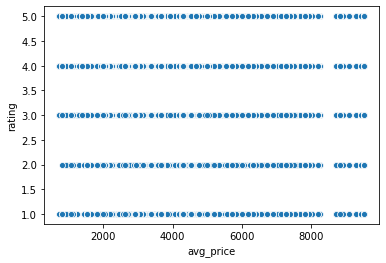

In [ ]:
sns.scatterplot(x='avg_price', y='rating', data=df)

In [ ]:
np.corrcoef(df.rating, df.avg_price)

array([[ 1., nan],
       [nan, nan]])

In [ ]:
np.mean([2410,3987])

3198.5

In [ ]:
t24_price = np.zeros(len(df[df.hotel_name == 'T24 Retro']), dtype=float)
t24_price = np.mean([2410,3987])
df[df.hotel_name == 'T24 Retro'].avg_price = t24_price

/Users/sundarraghavanl/opt/anaconda2/envs/main_shiz/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [ ]:
len(df[df.hotel_name == 'T24 Retro'].avg_price)

45

In [ ]:
t24_price

3198.5

In [ ]:
t24_price = np.zeros(len(df[df.hotel_name == 'T24 Retro']), dtype=float)

In [ ]:
t24_price

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
np.repeat(np.mean([2410,3987]), len(df[df.hotel_name == 'T24 Retro']))

array([3198.5, 3198.5, 3198.5, 3198.5, 3198.5, 3198.5, 3198.5, 3198.5,
       3198.5, 3198.5, 3198.5, 3198.5, 3198.5, 3198.5, 3198.5, 3198.5,
       3198.5, 3198.5, 3198.5, 3198.5, 3198.5, 3198.5, 3198.5, 3198.5,
       3198.5, 3198.5, 3198.5, 3198.5, 3198.5, 3198.5, 3198.5, 3198.5,
       3198.5, 3198.5, 3198.5, 3198.5, 3198.5, 3198.5, 3198.5, 3198.5,
       3198.5, 3198.5, 3198.5, 3198.5, 3198.5])

In [ ]:
df[df.hotel_name == 'T24 Retro']['avg_price'] = np.repeat(np.mean([2410,3987]), len(df[df.hotel_name == 'T24 Retro']))

/Users/sundarraghavanl/opt/anaconda2/envs/main_shiz/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df.loc[df[df.hotel_name == 'T24 Retro'].index, 'avg_price'] = np.repeat(np.mean([2410,3987]), len(df[df.hotel_name == 'T24 Retro']))

In [ ]:
df[df.hotel_name == 'T24 Retro']['avg_price']

45323    3198.5
45324    3198.5
45325    3198.5
45326    3198.5
45327    3198.5
45328    3198.5
45329    3198.5
45330    3198.5
45331    3198.5
45332    3198.5
45333    3198.5
45334    3198.5
45335    3198.5
45336    3198.5
45337    3198.5
45338    3198.5
45339    3198.5
45340    3198.5
45341    3198.5
45342    3198.5
45343    3198.5
45344    3198.5
45345    3198.5
45346    3198.5
45347    3198.5
45348    3198.5
45349    3198.5
45350    3198.5
45351    3198.5
45352    3198.5
45353    3198.5
45354    3198.5
45355    3198.5
45356    3198.5
45357    3198.5
45358    3198.5
45359    3198.5
45360    3198.5
45361    3198.5
45362    3198.5
45363    3198.5
45364    3198.5
45365    3198.5
45366    3198.5
45367    3198.5
Name: avg_price, dtype: float64

In [ ]:
df.loc[df[df.avg_price.isna()].index, 'avg_price'] = np.repeat(np.mean([7379, 9027]), 200)

In [ ]:
df[df.hotel_name=='The Rajbari Bawali']

,hotel_name,review,rating,precautions,amenities,trip_type,room_features,room_types,price_range,location,review_heading,Month,Year,Date,avg_price
110148,The Rajbari Bawali,From organising our Easter Holiday at The Rajb...,5,NaN,Free parking\nWifi\nPool\nFree breakfast\nHiki...,NaN,Air conditioning\nHousekeeping\nRoom service\n...,Bridal suite\nNon-smoking rooms\nSuites,IndiaWest BengalKolkata DistrictKolkata,Kolkata,Memorable Easter Holiday at The Rajbari Bawali,April,2021,2021-04-01,8203.0
110149,The Rajbari Bawali,"For a weekend hang out, or any other purpose b...",5,NaN,Free parking\nWifi\nPool\nFree breakfast\nHiki...,family,Air conditioning\nHousekeeping\nRoom service\n...,Bridal suite\nNon-smoking rooms\nSuites,IndiaWest BengalKolkata DistrictKolkata,Kolkata,It's a awesome experience,April,2021,2021-04-01,8203.0
110150,The Rajbari Bawali,Recently visited this Palace Resort with my fa...,3,NaN,Free parking\nWifi\nPool\nFree breakfast\nHiki...,NaN,Air conditioning\nHousekeeping\nRoom service\n...,Bridal suite\nNon-smoking rooms\nSuites,IndiaWest BengalKolkata DistrictKolkata,Kolkata,Recent visit to Rajbari Bawali,April,2021,2021-04-01,8203.0
110151,The Rajbari Bawali,An amazing 5 Star experience right from the We...,5,NaN,Free parking\nWifi\nPool\nFree breakfast\nHiki...,family,Air conditioning\nHousekeeping\nRoom service\n...,Bridal suite\nNon-smoking rooms\nSuites,IndiaWest BengalKolkata DistrictKolkata,Kolkata,Amazing Experience,March,2021,2021-03-01,8203.0
110152,The Rajbari Bawali,We stayed in the property over the week end. F...,5,NaN,Free parking\nWifi\nPool\nFree breakfast\nHiki...,family,Air conditioning\nHousekeeping\nRoom service\n...,Bridal suite\nNon-smoking rooms\nSuites,IndiaWest BengalKolkata DistrictKolkata,Kolkata,Excellent to be precise!,March,2021,2021-03-01,8203.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110343,The Rajbari Bawali,The propertiy and the building are awesome. We...,5,NaN,Free parking\nWifi\nPool\nFree breakfast\nHiki...,family,Air conditioning\nHousekeeping\nRoom service\n...,Bridal suite\nNon-smoking rooms\nSuites,IndiaWest BengalKolkata DistrictKolkata,Kolkata,Perfect Stay,November,2018,2018-11-01,8203.0
110344,The Rajbari Bawali,"Though we had initially planned for a stay, bu...",4,NaN,Free parking\nWifi\nPool\nFree breakfast\nHiki...,family,Air conditioning\nHousekeeping\nRoom service\n...,Bridal suite\nNon-smoking rooms\nSuites,IndiaWest BengalKolkata DistrictKolkata,Kolkata,An Evening Well Spent,November,2018,2018-11-01,8203.0
110345,The Rajbari Bawali,We went here for our first anniversary and not...,5,NaN,Free parking\nWifi\nPool\nFree breakfast\nHiki...,couple,Air conditioning\nHousekeeping\nRoom service\n...,Bridal suite\nNon-smoking rooms\nSuites,IndiaWest BengalKolkata DistrictKolkata,Kolkata,Excellent Short visit,December,2018,2018-12-01,8203.0
110346,The Rajbari Bawali,"This resort is the best we, very experienced t...",5,NaN,Free parking\nWifi\nPool\nFree breakfast\nHiki...,couple,Air conditioning\nHousekeeping\nRoom service\n...,Bridal suite\nNon-smoking rooms\nSuites,IndiaWest BengalKolkata DistrictKolkata,Kolkata,This is SUPER🏆,November,2018,2018-11-01,8203.0


In [ ]:
np.corrcoef(df.rating, df.avg_price)

array([[1.        , 0.06567435],
       [0.06567435, 1.        ]])

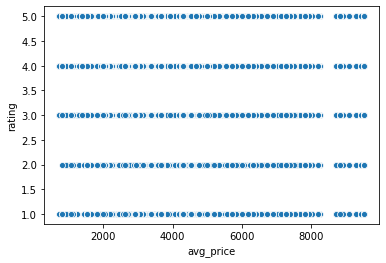

In [ ]:
sns.scatterplot(x='avg_price', y='rating', data=df);

In [ ]:
df.to_csv('eda_trial.csv')

In [ ]:
df.amenities[0]

'Free parking\nWifi\nPool\nFitness Centre with Gym / Workout Room\nRestaurant\nAirport transportation\nBusiness Centre with Internet Access\nConference facilities\nSecured parking\nRooftop pool\nOutdoor pool\nPersonal trainer\nBreakfast available\nBreakfast buffet\nBreakfast in the room\nCar hire\nMeeting rooms\n24-hour security\nBaggage storage\nConcierge\nNewspaper\nDoorperson\n24-hour front desk\nDry cleaning\nLaundry service\nIroning service\nShoeshine'

In [ ]:
amenities = np.array(df.amenities)

In [ ]:
amenities_count = np.char.count(amenities.astype(str), '\n') + 1

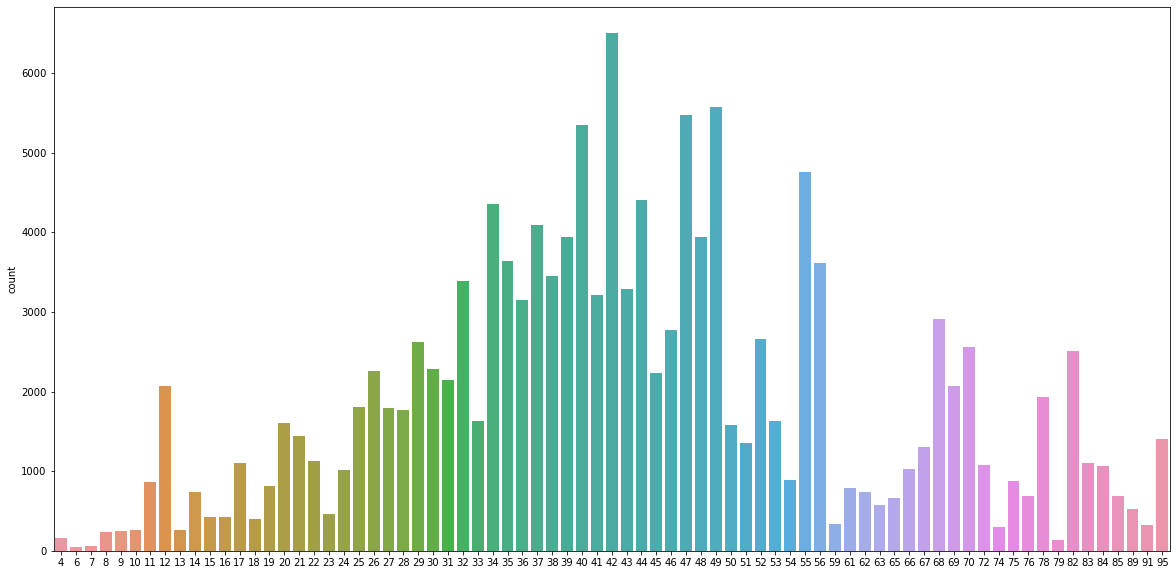

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(amenities_count);

In [ ]:
np.corrcoef(amenities_count, ratings)

array([[1.       , 0.1149274],
       [0.1149274, 1.       ]])

In [ ]:
pd.read_csv('eda_trial.csv')

,Unnamed: 0,hotel_name,review,rating,precautions,amenities,trip_type,room_features,room_types,price_range,location,review_heading,Month,Year,Date,avg_price
0,0,Svelte Hotel and Personal Suites,Decided to stay in the hotel to celebrate a fr...,5,NaN,Free parking\nWifi\nPool\nFitness Centre with ...,friends,Air conditioning\nHousekeeping\nRoom service\n...,Non-smoking rooms\nSuites,"₹ 6,396 - ₹ 9,231",New Delhi,Good Hotel,February,2021,2021-02-01,7813.5
1,1,Svelte Hotel and Personal Suites,"Nice Hotel , Room Size was very good , Mu room...",4,NaN,Free parking\nWifi\nPool\nFitness Centre with ...,business,Air conditioning\nHousekeeping\nRoom service\n...,Non-smoking rooms\nSuites,"₹ 6,396 - ₹ 9,231",New Delhi,Visit - 21st March,March,2021,2021-03-01,7813.5
2,2,Svelte Hotel and Personal Suites,Well clearly this hotel didn't stand close to ...,1,NaN,Free parking\nWifi\nPool\nFitness Centre with ...,NaN,Air conditioning\nHousekeeping\nRoom service\n...,Non-smoking rooms\nSuites,"₹ 6,396 - ₹ 9,231",New Delhi,Not Worth In Anyway,February,2020,2020-02-01,7813.5
3,3,Svelte Hotel and Personal Suites,Average hotel with a great locational plus poi...,3,NaN,Free parking\nWifi\nPool\nFitness Centre with ...,NaN,Air conditioning\nHousekeeping\nRoom service\n...,Non-smoking rooms\nSuites,"₹ 6,396 - ₹ 9,231",New Delhi,Mediocre place,February,2020,2020-02-01,7813.5
4,4,Svelte Hotel and Personal Suites,They are good but sometimes they act as 2 star...,3,NaN,Free parking\nWifi\nPool\nFitness Centre with ...,business,Air conditioning\nHousekeeping\nRoom service\n...,Non-smoking rooms\nSuites,"₹ 6,396 - ₹ 9,231",New Delhi,Behviour,February,2020,2020-02-01,7813.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140983,140983,Regenta Central Antarim,"Please improve your breakfast menu, it's one a...",3,NaN,Free parking\nFree High Speed Internet (WiFi)\...,business,Air conditioning\nRoom service\nSafe\nMinibar\...,Non-smoking rooms\nSuites\nFamily rooms\nSmoki...,"₹2,346 - ₹6,231",Ahmedabad,Prakkash Chaurasia,December,2018,2018-12-01,4288.5
140984,140984,Regenta Central Antarim,This is a new property with great decor. Its f...,5,NaN,Free parking\nFree High Speed Internet (WiFi)\...,business,Air conditioning\nRoom service\nSafe\nMinibar\...,Non-smoking rooms\nSuites\nFamily rooms\nSmoki...,"₹2,346 - ₹6,231",Ahmedabad,Excellent Hotel. Good value for money.,December,2018,2018-12-01,4288.5
140985,140985,Regenta Central Antarim,Extremely clean and hygienic rooms and on-poin...,5,NaN,Free parking\nFree High Speed Internet (WiFi)\...,solo,Air conditioning\nRoom service\nSafe\nMinibar\...,Non-smoking rooms\nSuites\nFamily rooms\nSmoki...,"₹2,346 - ₹6,231",Ahmedabad,Great experience,December,2018,2018-12-01,4288.5
140986,140986,Regenta Central Antarim,Good hospitality and very friendly staff espec...,5,NaN,Free parking\nFree High Speed Internet (WiFi)\...,business,Air conditioning\nRoom service\nSafe\nMinibar\...,Non-smoking rooms\nSuites\nFamily rooms\nSmoki...,"₹2,346 - ₹6,231",Ahmedabad,Amazing hospitality and friendly staff,December,2018,2018-12-01,4288.5


In [ ]:
room_types = np.array(df.room_types).astype(str)

In [ ]:
room_types

array(['Non-smoking rooms\nSuites', 'Non-smoking rooms\nSuites',
       'Non-smoking rooms\nSuites', ...,
       'Non-smoking rooms\nSuites\nFamily rooms\nSmoking rooms available',
       'Non-smoking rooms\nSuites\nFamily rooms\nSmoking rooms available',
       'Non-smoking rooms\nSuites\nFamily rooms\nSmoking rooms available'],
      dtype='<U123')

In [ ]:
for i in range(len(room_types)):
    if('_' in room_types[i]):
        print(i)

3545
3546
3547
3548
3549
3550
3551
3552
3553
3554
3555
3556
3557
3558
3559
3560
3561
3562
3563
3564
3565
3566
3567
3568
3569
3570
3571
3572
3573
3574
3575
3576
3577
3578
3579
3580
3581
3582
3583
3584
3585
3586
3587
3588
3589
3590
3591
3592
3593
3594
3595
3596
3597
3598
3599
3600
3601
3602
3603
3604
3605
3606
3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699
3700
3701
3702
3703
3704
3705
3706
3707
3708
3709
3710
3711
3712
3713
3714
3715
3716
3717
3718
3719
3720
3721
3722
3723
3724
3725
3726
3727
3728
3729
3730
3731
3732
3733
3734
3735
3736
3737
3738
3739
3740
3741
3742
3743
3744


In [ ]:
room_types[4275]

'Non-smoking rooms\nSuites\nFamily rooms'

In [ ]:
df.iloc[7960]

hotel_name                                    Le Meridien New Delhi
review            The hotel's location and association with Marr...
rating                                                            2
precautions       Hand sanitizer available to guests & staff\nRe...
amenities         Free parking\nFree internet\nPool\nFitness Cen...
trip_type                                                  business
room_features     Additional bathroom\nHousekeeping\nRoom servic...
room_types        tags_category_tag_non_smoking_rooms_1\nhotel_a...
price_range                                      ₹ 5,461 - ₹ 14,417
location                                                  New Delhi
review_heading                                  Not worth the Name!
Month                                                        August
Year                                                           2020
Date                                            2020-08-01 00:00:00
avg_price                                       

In [ ]:
df[df.hotel_name=='Le Meridien New Delhi']

,hotel_name,review,rating,precautions,amenities,trip_type,room_features,room_types,price_range,location,review_heading,Month,Year,Date,avg_price
7960,Le Meridien New Delhi,The hotel's location and association with Marr...,2,Hand sanitizer available to guests & staff\nRe...,Free parking\nFree internet\nPool\nFitness Cen...,business,Additional bathroom\nHousekeeping\nRoom servic...,tags_category_tag_non_smoking_rooms_1\nhotel_a...,"₹ 5,461 - ₹ 14,417",New Delhi,Not worth the Name!,August,2020,2020-08-01,4939.0
7961,Le Meridien New Delhi,"Visited with friends, pathetic food, disaster ...",1,Hand sanitizer available to guests & staff\nRe...,Free parking\nFree internet\nPool\nFitness Cen...,friends,Additional bathroom\nHousekeeping\nRoom servic...,tags_category_tag_non_smoking_rooms_1\nhotel_a...,"₹ 5,461 - ₹ 14,417",New Delhi,Disaster,March,2021,2021-03-01,4939.0
7962,Le Meridien New Delhi,Good support staff. Good location great ambien...,5,Hand sanitizer available to guests & staff\nRe...,Free parking\nFree internet\nPool\nFitness Cen...,couple,Additional bathroom\nHousekeeping\nRoom servic...,tags_category_tag_non_smoking_rooms_1\nhotel_a...,"₹ 5,461 - ₹ 14,417",New Delhi,5 star,December,2020,2020-12-01,4939.0
7963,Le Meridien New Delhi,I stayed with my family for last couple of day...,5,Hand sanitizer available to guests & staff\nRe...,Free parking\nFree internet\nPool\nFitness Cen...,NaN,Additional bathroom\nHousekeeping\nRoom servic...,tags_category_tag_non_smoking_rooms_1\nhotel_a...,"₹ 5,461 - ₹ 14,417",New Delhi,Hotel with excellent hospitality,February,2021,2021-02-01,4939.0
7964,Le Meridien New Delhi,I checked into this hotel today on the 14th of...,1,Hand sanitizer available to guests & staff\nRe...,Free parking\nFree internet\nPool\nFitness Cen...,family,Additional bathroom\nHousekeeping\nRoom servic...,tags_category_tag_non_smoking_rooms_1\nhotel_a...,"₹ 5,461 - ₹ 14,417",New Delhi,Outdated hotel with out dated facilities,February,2021,2021-02-01,4939.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8160,Le Meridien New Delhi,For some reason I was expecting more but this ...,4,Hand sanitizer available to guests & staff\nRe...,Free parking\nFree internet\nPool\nFitness Cen...,business,Additional bathroom\nHousekeeping\nRoom servic...,tags_category_tag_non_smoking_rooms_1\nhotel_a...,"₹ 5,461 - ₹ 14,417",New Delhi,Just fine...,November,2019,2019-11-01,4939.0
8161,Le Meridien New Delhi,I am staying at this hotel right now and I hav...,4,Hand sanitizer available to guests & staff\nRe...,Free parking\nFree internet\nPool\nFitness Cen...,business,Additional bathroom\nHousekeeping\nRoom servic...,tags_category_tag_non_smoking_rooms_1\nhotel_a...,"₹ 5,461 - ₹ 14,417",New Delhi,No peace in this hotel! Not good for light sle...,November,2019,2019-11-01,4939.0
8162,Le Meridien New Delhi,I spent 6 evenings at Le Meridien for a busine...,5,Hand sanitizer available to guests & staff\nRe...,Free parking\nFree internet\nPool\nFitness Cen...,business,Additional bathroom\nHousekeeping\nRoom servic...,tags_category_tag_non_smoking_rooms_1\nhotel_a...,"₹ 5,461 - ₹ 14,417",New Delhi,Excellent stay,October,2019,2019-10-01,4939.0
8163,Le Meridien New Delhi,"Located almost at the heart of New Delhi, is t...",4,Hand sanitizer available to guests & staff\nRe...,Free parking\nFree internet\nPool\nFitness Cen...,NaN,Additional bathroom\nHousekeeping\nRoom servic...,tags_category_tag_non_smoking_rooms_1\nhotel_a...,"₹ 5,461 - ₹ 14,417",New Delhi,Official visit to Le Meridien New Delhi,December,2018,2018-12-01,4939.0


In [ ]:
room_types[3545:4275] = 'Non-smoking rooms\nSuites\nFamily rooms\nSmoking rooms available'

In [ ]:
room_types[7960:8165] = 'Non-smoking rooms\nSuites\nFamily rooms'

# Reviews text cleaning and preprocessing

In [ ]:
import re
import nltk
import spacy
import string

In [ ]:
df.review

0         Decided to stay in the hotel to celebrate a fr...
1         Nice Hotel , Room Size was very good , Mu room...
2         Well clearly this hotel didn't stand close to ...
3         Average hotel with a great locational plus poi...
4         They are good but sometimes they act as 2 star...
                                ...                        
521397    It was indeed pleasurable stay at Red Fox Bhiw...
521398    Place where u can fell the nature, location is...
521399    Our family stayed two nights here in two bedro...
521400    A comfortable hotel with nice room and grounds...
521401    I would say it's a good place to visit once. S...
Name: review, Length: 521402, dtype: object

In [ ]:
!pip install unidecode
!pip install contractions
!pip install emot

In [ ]:
from gensim.models import Phrases

def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

df_covid = df[df.Date>'2020-02-01']
data = df_covid[df_covid.rating<4].values.tolist()
data_words = list(sent_to_words(data))

In [ ]:
df['cleaned_review'] = df.review.str.lower()

# didn't -> did not
import contractions
def fix_cont(text):
  return contractions.fix(text)
df['cleaned_review'] = df['cleaned_review'].apply(fix_cont)

# lemmatization using POS
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

lemmatizer = WordNetLemmatizer()
wordnet_map = {"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV} # Pos tag, used Noun, Verb, Adjective and Adverb
# Function for lemmatization using POS tag
def lemmatize_words(text):
    pos_tagged_text = nltk.pos_tag(text.split())
    return " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_tagged_text])

df['cleaned_review'] = df['cleaned_review'].apply(lemmatize_words)

# removing punctuations
df['cleaned_review'] = df.cleaned_review.str.replace('[^\w\s]', '')

# removing stopwords and rare words
nltk.download('stopwords')
from nltk.corpus import stopwords

'''
# rare words
freq = pd.Series(' '.join(df['cleaned_review']).split()).value_counts()
words = list(freq.index)
freq_np = np.array(freq)
'''

my_stopwords = stopwords.words('english') + ['th', 'n', 'u', 'mr', 'mrs', 'ur', 'ms']
my_stopwords_set = set(my_stopwords)

def rem_sw(text):
  return ' '.join([word for word in str(text).split() if word not in my_stopwords_set])

df['cleaned_review'] = df.cleaned_review.apply(rem_sw)


#removing leading and lagging spaces and redundant double/triple spaces in the middle and replacing em all with single space
def rem_spaces(text):
  text = re.sub(' +', ' ', text)
  return text

df['cleaned_review'] = df['cleaned_review'].apply(rem_spaces)

# making sure all characters are ASCII and converting them into ASCII if they aren't
import unidecode
df['cleaned_review'] = df['cleaned_review'].apply(lambda x: unidecode.unidecode(x))


# removing all words that don't exist in the dictionary
# this will eleiminate the names of the staff members mentioend in the reviews as well as other gibberish
# might wanna fix typos first so that we don't miss valuable text
nltk.download('words')
words = set(nltk.corpus.words.words())
df.cleaned_review = df.cleaned_review.apply(lambda r: ' '.join(w for w in nltk.wordpunct_tokenize(r) if w.lower() in words or not w.isalpha()))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [ ]:
df.cleaned_review

0         decide stay hotel celebrate friend birthday re...
1         nice hotel room size good mu room 404 request ...
2         well clearly hotel stand close speak even mana...
3         average hotel great locational plus point room...
4         good sometimes act 2 star property frequently ...
                                ...                        
521397    indeed pleasurable stay red fox exterior need ...
521398    place fell nature location nice beautiful hote...
521399    family stay two night two hotel situate 5km to...
521400    comfortable hotel nice room grounds food good ...
521401    would say good place visit temple close resort...
Name: cleaned_review, Length: 521402, dtype: object

In [ ]:
# common words

from collections import Counter
cnt = Counter()
for text in df['cleaned_review'].values:
  for word in text.split():
    cnt[word]+=1
cnt.most_common(20)

[('stay', 403485),
 ('hotel', 399851),
 ('good', 396391),
 ('room', 371744),
 ('staff', 354146),
 ('food', 305544),
 ('service', 242167),
 ('great', 174554),
 ('place', 173117),
 ('make', 144666),
 ('nice', 140557),
 ('visit', 138761),
 ('well', 137957),
 ('also', 136630),
 ('experience', 125552),
 ('time', 125153),
 ('one', 122691),
 ('excellent', 119942),
 ('best', 115050),
 ('would', 112706)]

In [ ]:
'''
# rare words

freq = pd.Series(' '.join(df['cleaned_review']).split()).value_counts()
words = list(freq.index)
freq_np = np.array(freq)

rare_words=[]
for i in np.argwhere(freq_np<=2):
  rare_words.append(words[i[0].astype(int)])


# still a lotta typos and gibbersh
# much much better than what we had before tho

'''

In [ ]:
rare_words

# it worked

[]

## Using spaCy

In [ ]:
import spacy #load spacy
nlp = spacy.load("en")
stops = stopwords.words("english")

def normalize(comment, lowercase, remove_stopwords):
    if lowercase:
        comment = comment.lower()
    comment = nlp(comment)
    lemmatized = list()
    for word in comment:
        lemma = word.lemma_.strip()
        if lemma:
            if not remove_stopwords or (remove_stopwords and lemma not in stops):
                lemmatized.append(lemma)
    return " ".join(lemmatized)


df.review[0:10].apply(normalize, lowercase=True, remove_stopwords=True)

0    decide stay hotel celebrate friend birthday -P...
1    nice hotel , room size good , mu room 404 requ...
2    well clearly hotel stand close -PRON- expectat...
3    average hotel great locational plus point . ro...
4    -PRON- good sometimes -PRON- act 2 star proper...
5    pay much money hotel staff professional -PRON-...
6    amazing hotel good room & great view.locaion c...
7    hotel meet great -PRON- expectations.great roo...
8    bad hotel ever ! -PRON- request 3 superior roo...
9    definitely 4 star hotel . hotel need remodelle...
Name: review, dtype: object

In [ ]:
doc = nlp(df.review[2])
print("Verbs:", [token.text for token in doc if token.pos_ == "VERB"])

Verbs: ['stand', 'spoken', 'lead', 'could', 'make', 'stay', 'Will', 'argue', 'comes', 'saw', 'smiling', 'help', 'want', 'use', 'prepared', 'will', 'take', 'take', 'made', 'charged', 'bother', 'checking', 'informed', 'disinterested', 'speak', 'want', 'ask', 'called', 'stay', 'think', 'would', 'make', 'got', 'chose', 'reply', 'arrive', 'feel', 'reached', 'missing', 'see', 'fall', 'choose', 'save', 'spend', 'faced', 'forgetting', 'choose']


In [ ]:
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
sid.polarity_scores(df['cleaned_review'][1])

{'compound': 0.9565, 'neg': 0.042, 'neu': 0.527, 'pos': 0.431}

In [ ]:
df['cleaned_review'][1]

'nice hotel room size good mu room 404 request twin rooms breakfast limited location perfect many restaurant shops mall beside hotel perfect long stay guest family room microwave facilities nice perfect'

# Word2Vec intuition building

In [ ]:
import re

def fix_string(array):
    #punctuations=r'''!()-[]{};:'"\,<>./?@#$%^&*_~'''
    array = np.char.replace(array.astype(str), '\n', ',')
    #for x in punctuations:
    #    array = np.char.replace(array.astype(str), x, ' ')
    return array

In [ ]:
room_types = fix_string(room_types)

In [ ]:
for i in enumerate(room_types[0:5]):
    print(i)

(0, 'Non-smoking rooms,Suites')
(1, 'Non-smoking rooms,Suites')
(2, 'Non-smoking rooms,Suites')
(3, 'Non-smoking rooms,Suites')
(4, 'Non-smoking rooms,Suites')


In [ ]:
# Defining the window for context
window = 2

# Creating a placeholder for the scanning of the word list
word_lists = []
all_text = []

for text in np.char.split(np.random.choice(room_types, 2000), ','):

    # Appending to the all text list
    all_text += text

    # Creating a context dictionary
    for i, word in enumerate(text):
        for w in range(window):
            # Getting the context that is ahead by *window* words
            if i + 1 + w < len(text):
                word_lists.append([word] + [text[(i + 1 + w)]])
            # Getting the context that is behind by *window* words
            if i - w - 1 >= 0:
                word_lists.append([word] + [text[(i - w - 1)]])

In [ ]:
word_lists

[['Non-smoking rooms', 'Suites'],
 ['Non-smoking rooms', 'Family rooms'],
 ['Suites', 'Family rooms'],
 ['Suites', 'Non-smoking rooms'],
 ['Suites', 'Smoking rooms available'],
 ['Family rooms', 'Smoking rooms available'],
 ['Family rooms', 'Suites'],
 ['Family rooms', 'Non-smoking rooms'],
 ['Smoking rooms available', 'Family rooms'],
 ['Smoking rooms available', 'Suites'],
 ['Non-smoking rooms', 'Suites'],
 ['Non-smoking rooms', 'Family rooms'],
 ['Suites', 'Family rooms'],
 ['Suites', 'Non-smoking rooms'],
 ['Suites', 'Smoking rooms available'],
 ['Family rooms', 'Smoking rooms available'],
 ['Family rooms', 'Suites'],
 ['Family rooms', 'Non-smoking rooms'],
 ['Smoking rooms available', 'Family rooms'],
 ['Smoking rooms available', 'Suites'],
 ['Landmark view', 'Non-smoking rooms'],
 ['Landmark view', 'Suites'],
 ['Non-smoking rooms', 'Suites'],
 ['Non-smoking rooms', 'Landmark view'],
 ['Non-smoking rooms', 'Family rooms'],
 ['Suites', 'Family rooms'],
 ['Suites', 'Non-smoking room

In [ ]:
all_text

['Non-smoking rooms',
 'Suites',
 'Family rooms',
 'Smoking rooms available',
 'Non-smoking rooms',
 'Suites',
 'Family rooms',
 'Smoking rooms available',
 'Landmark view',
 'Non-smoking rooms',
 'Suites',
 'Family rooms',
 'Smoking rooms available',
 'Non-smoking rooms',
 'Non-smoking rooms',
 'Family rooms',
 'Smoking rooms available',
 'Non-smoking rooms',
 'Suites',
 'City view',
 'Landmark view',
 'Pool view',
 'Bridal suite',
 'Non-smoking rooms',
 'Suites',
 'Family rooms',
 'Smoking rooms available',
 'Non-smoking rooms',
 'Suites',
 'Family rooms',
 'Smoking rooms available',
 'Non-smoking rooms',
 'Suites',
 'Family rooms',
 'Smoking rooms available',
 'Bridal suite',
 'Non-smoking rooms',
 'Suites',
 'Family rooms',
 'Smoking rooms available',
 'Non-smoking rooms',
 'Suites',
 'Family rooms',
 'Smoking rooms available',
 'City view',
 'Bridal suite',
 'Non-smoking rooms',
 'Suites',
 'Family rooms',
 'Smoking rooms available',
 'Non-smoking rooms',
 'Suites',
 'Family rooms

In [ ]:
def create_unique_word_dict(text:list) -> dict:
    """
    A method that creates a dictionary where the keys are unique words
    and key values are indices
    """
    # Getting all the unique words from our text and sorting them alphabetically
    words = list(set(text))
    words.sort()

    # Creating the dictionary for the unique words
    unique_word_dict = {}
    for i, word in enumerate(words):
        unique_word_dict.update({
            word: i
        })

    return unique_word_dict

In [ ]:
unique_word_dict = create_unique_word_dict(all_text)

In [ ]:
unique_word_dict

{'Bridal suite': 0,
 'City view': 1,
 'Family rooms': 2,
 'Landmark view': 3,
 'Mountain view': 4,
 'Non-smoking rooms': 5,
 'Ocean view': 6,
 'Pool view': 7,
 'Smoking rooms available': 8,
 'Suites': 9,
 'nan': 10}

In [ ]:
from scipy import sparse
import numpy as np
from tqdm import tqdm

# Defining the number of features (unique words)
n_words = len(unique_word_dict)

# Getting all the unique words
words = list(unique_word_dict.keys())

# Creating the X and Y matrices using one hot encoding
X = []
Y = []

for i, word_list in tqdm(enumerate(word_lists)):
    # Getting the indices
    main_word_index = unique_word_dict.get(word_list[0])
    context_word_index = unique_word_dict.get(word_list[1])

    # Creating the placeholders
    X_row = np.zeros(n_words)
    Y_row = np.zeros(n_words)

    # One hot encoding the main word
    X_row[main_word_index] = 1

    # One hot encoding the Y matrix words
    Y_row[context_word_index] = 1

    # Appending to the main matrices
    X.append(X_row)
    Y.append(Y_row)

# Converting the matrices into an array
X = np.asarray(X)
Y = np.asarray(Y)

22154it [00:00, 188069.09it/s]


In [ ]:
np.shape(X)

(22154, 11)

In [ ]:
X[0,:]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.])

In [ ]:
# Deep learning:
from keras.models import Input, Model
from keras.layers import Dense

# Defining the size of the embedding
embed_size = 2

# Defining the neural network
inp = Input(shape=(X.shape[1],))
x = Dense(units=embed_size, activation='linear')(inp)
x = Dense(units=Y.shape[1], activation='softmax')(x)
model = Model(inputs=inp, outputs=x)
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam')

# Optimizing the network weights
model.fit(
    x=X,
    y=Y,
    batch_size=256,
    epochs=1000
    )

# Obtaining the weights from the neural network.
# These are the so called word embeddings

# The input layer
weights = model.get_weights()[0]

# Creating a dictionary to store the embeddings in. The key is a unique word and
# the value is the numeric vector
embedding_dict = {}
for word in words:
    embedding_dict.update({
        word: weights[unique_word_dict.get(word)]
        })

Epoch 1/1000
86/86 [==============================] - 0s 1ms/step - loss: 2.3147
Epoch 2/1000
86/86 [==============================] - 0s 2ms/step - loss: 2.2044
Epoch 3/1000
86/86 [==============================] - 0s 2ms/step - loss: 2.1017
Epoch 4/1000
86/86 [==============================] - 0s 2ms/step - loss: 2.0101
Epoch 5/1000
86/86 [==============================] - 0s 2ms/step - loss: 1.9310
Epoch 6/1000
86/86 [==============================] - 0s 2ms/step - loss: 1.8608
Epoch 7/1000
86/86 [==============================] - 0s 2ms/step - loss: 1.7995
Epoch 8/1000
86/86 [==============================] - 0s 2ms/step - loss: 1.7519
Epoch 9/1000
86/86 [==============================] - 0s 2ms/step - loss: 1.7175
Epoch 10/1000
86/86 [==============================] - 0s 2ms/step - loss: 1.6926
Epoch 11/1000
86/86 [==============================] - 0s 1ms/step - loss: 1.6738
Epoch 12/1000
86/86 [==============================] - 0s 2ms/step - loss: 1.6589
Epoch 13/1000
86/86 [====

86/86 [==============================] - 0s 2ms/step - loss: 1.5064
Epoch 102/1000
86/86 [==============================] - 0s 1ms/step - loss: 1.5064
Epoch 103/1000
86/86 [==============================] - 0s 1ms/step - loss: 1.5063
Epoch 104/1000
86/86 [==============================] - 0s 2ms/step - loss: 1.5061
Epoch 105/1000
86/86 [==============================] - 0s 2ms/step - loss: 1.5060
Epoch 106/1000
86/86 [==============================] - 0s 2ms/step - loss: 1.5058
Epoch 107/1000
86/86 [==============================] - 0s 1ms/step - loss: 1.5057
Epoch 108/1000
86/86 [==============================] - 0s 1ms/step - loss: 1.5057
Epoch 109/1000
86/86 [==============================] - 0s 1ms/step - loss: 1.5055
Epoch 110/1000
86/86 [==============================] - 0s 1ms/step - loss: 1.5054
Epoch 111/1000
86/86 [==============================] - 0s 2ms/step - loss: 1.5053
Epoch 112/1000
86/86 [==============================] - 0s 2ms/step - loss: 1.5052
Epoch 113/1000
86/8

86/86 [==============================] - 0s 2ms/step - loss: 1.4988
Epoch 298/1000
86/86 [==============================] - 0s 2ms/step - loss: 1.4989
Epoch 299/1000
86/86 [==============================] - 0s 2ms/step - loss: 1.4988
Epoch 300/1000
86/86 [==============================] - 0s 2ms/step - loss: 1.4986
Epoch 301/1000
86/86 [==============================] - 0s 2ms/step - loss: 1.4986
Epoch 302/1000
86/86 [==============================] - 0s 1ms/step - loss: 1.4987
Epoch 303/1000
86/86 [==============================] - 0s 1ms/step - loss: 1.4986
Epoch 304/1000
86/86 [==============================] - 0s 1ms/step - loss: 1.4985
Epoch 305/1000
86/86 [==============================] - 0s 2ms/step - loss: 1.4986
Epoch 306/1000
86/86 [==============================] - 0s 1ms/step - loss: 1.4986
Epoch 307/1000
86/86 [==============================] - 0s 3ms/step - loss: 1.4987
Epoch 308/1000
86/86 [==============================] - 0s 3ms/step - loss: 1.4985
Epoch 309/1000
86/8

86/86 [==============================] - 0s 2ms/step - loss: 1.4972
Epoch 494/1000
86/86 [==============================] - 0s 1ms/step - loss: 1.4971
Epoch 495/1000
86/86 [==============================] - 0s 2ms/step - loss: 1.4972
Epoch 496/1000
86/86 [==============================] - 0s 1ms/step - loss: 1.4972
Epoch 497/1000
86/86 [==============================] - 0s 2ms/step - loss: 1.4970
Epoch 498/1000
86/86 [==============================] - 0s 2ms/step - loss: 1.4972
Epoch 499/1000
86/86 [==============================] - 0s 1ms/step - loss: 1.4974
Epoch 500/1000
86/86 [==============================] - 0s 1ms/step - loss: 1.4971
Epoch 501/1000
86/86 [==============================] - 0s 2ms/step - loss: 1.4972
Epoch 502/1000
86/86 [==============================] - 0s 1ms/step - loss: 1.4973
Epoch 503/1000
86/86 [==============================] - 0s 1ms/step - loss: 1.4970
Epoch 504/1000
86/86 [==============================] - 0s 1ms/step - loss: 1.4973
Epoch 505/1000
86/8

86/86 [==============================] - 0s 1ms/step - loss: 1.4967
Epoch 690/1000
86/86 [==============================] - 0s 1ms/step - loss: 1.4964
Epoch 691/1000
86/86 [==============================] - 0s 1ms/step - loss: 1.4967
Epoch 692/1000
86/86 [==============================] - 0s 2ms/step - loss: 1.4964
Epoch 693/1000
86/86 [==============================] - 0s 1ms/step - loss: 1.4965
Epoch 694/1000
86/86 [==============================] - 0s 1ms/step - loss: 1.4967
Epoch 695/1000
86/86 [==============================] - 0s 2ms/step - loss: 1.4964
Epoch 696/1000
86/86 [==============================] - 0s 1ms/step - loss: 1.4964
Epoch 697/1000
86/86 [==============================] - 0s 2ms/step - loss: 1.4966
Epoch 698/1000
86/86 [==============================] - 0s 1ms/step - loss: 1.4964
Epoch 699/1000
86/86 [==============================] - 0s 1ms/step - loss: 1.4966
Epoch 700/1000
86/86 [==============================] - 0s 2ms/step - loss: 1.4966
Epoch 701/1000
86/8

86/86 [==============================] - 0s 2ms/step - loss: 1.4960
Epoch 886/1000
86/86 [==============================] - 0s 1ms/step - loss: 1.4961
Epoch 887/1000
86/86 [==============================] - 0s 1ms/step - loss: 1.4959
Epoch 888/1000
86/86 [==============================] - 0s 2ms/step - loss: 1.4961
Epoch 889/1000
86/86 [==============================] - 0s 1ms/step - loss: 1.4962
Epoch 890/1000
86/86 [==============================] - 0s 2ms/step - loss: 1.4962
Epoch 891/1000
86/86 [==============================] - 0s 1ms/step - loss: 1.4961
Epoch 892/1000
86/86 [==============================] - 0s 1ms/step - loss: 1.4962
Epoch 893/1000
86/86 [==============================] - 0s 2ms/step - loss: 1.4961
Epoch 894/1000
86/86 [==============================] - 0s 2ms/step - loss: 1.4960
Epoch 895/1000
86/86 [==============================] - 0s 1ms/step - loss: 1.4960
Epoch 896/1000
86/86 [==============================] - 0s 1ms/step - loss: 1.4961
Epoch 897/1000
86/8

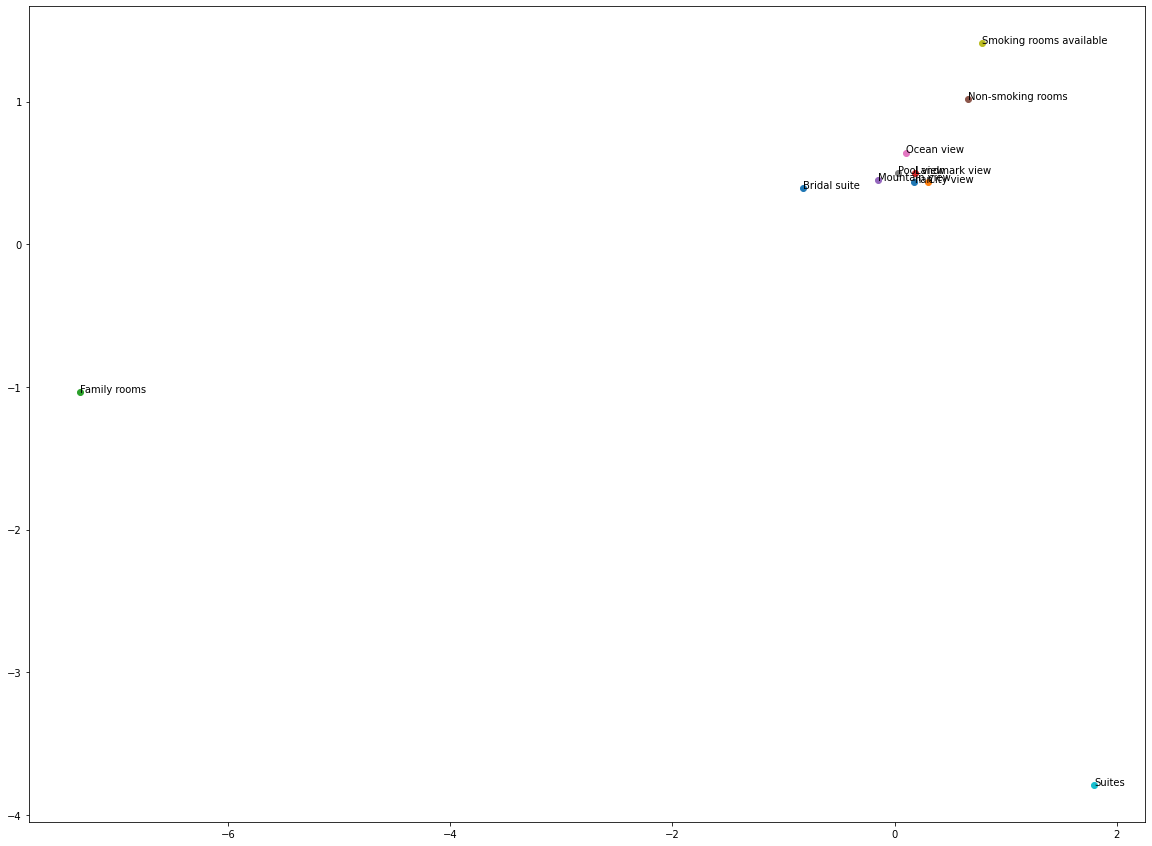

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 15))
for word in list(unique_word_dict.keys()):
    coord = embedding_dict.get(word)
    plt.scatter(coord[0], coord[1])
    plt.annotate(word, (coord[0], coord[1]))

In [ ]:
embedding_dict

{'Bridal suite': array([-0.82157874,  0.39168963], dtype=float32),
 'City view': array([0.29665852, 0.43476966], dtype=float32),
 'Family rooms': array([-7.335023, -1.038213], dtype=float32),
 'Landmark view': array([0.1798159, 0.4988449], dtype=float32),
 'Mountain view': array([-0.15066655,  0.44952923], dtype=float32),
 'Non-smoking rooms': array([0.664275 , 1.0206871], dtype=float32),
 'Ocean view': array([0.09881561, 0.6423461 ], dtype=float32),
 'Pool view': array([0.03052776, 0.50126207], dtype=float32),
 'Smoking rooms available': array([0.7888061, 1.4082193], dtype=float32),
 'Suites': array([ 1.7959917, -3.7893333], dtype=float32),
 'nan': array([0.1720308 , 0.43338692], dtype=float32)}

# Entity embedding

In [ ]:
from keras.layers import *
from keras.models import *

In [ ]:
df

,hotel_name,review,rating,precautions,amenities,trip_type,room_features,room_types,price_range,location,review_heading,Month,Year,Date,avg_price,business,couple,family,friends,solo
0,Svelte Hotel and Personal Suites,Decided to stay in the hotel to celebrate a fr...,5,NaN,Free parking\nWifi\nPool\nFitness Centre with ...,friends,Air conditioning\nHousekeeping\nRoom service\n...,Non-smoking rooms\nSuites,"₹ 6,396 - ₹ 9,231",New Delhi,Good Hotel,February,2021,2021-02-01,7813.5,0,0,0,1,0
1,Svelte Hotel and Personal Suites,"Nice Hotel , Room Size was very good , Mu room...",4,NaN,Free parking\nWifi\nPool\nFitness Centre with ...,business,Air conditioning\nHousekeeping\nRoom service\n...,Non-smoking rooms\nSuites,"₹ 6,396 - ₹ 9,231",New Delhi,Visit - 21st March,March,2021,2021-03-01,7813.5,1,0,0,0,0
2,Svelte Hotel and Personal Suites,Well clearly this hotel didn't stand close to ...,1,NaN,Free parking\nWifi\nPool\nFitness Centre with ...,NaN,Air conditioning\nHousekeeping\nRoom service\n...,Non-smoking rooms\nSuites,"₹ 6,396 - ₹ 9,231",New Delhi,Not Worth In Anyway,February,2020,2020-02-01,7813.5,0,0,0,0,0
3,Svelte Hotel and Personal Suites,Average hotel with a great locational plus poi...,3,NaN,Free parking\nWifi\nPool\nFitness Centre with ...,NaN,Air conditioning\nHousekeeping\nRoom service\n...,Non-smoking rooms\nSuites,"₹ 6,396 - ₹ 9,231",New Delhi,Mediocre place,February,2020,2020-02-01,7813.5,0,0,0,0,0
4,Svelte Hotel and Personal Suites,They are good but sometimes they act as 2 star...,3,NaN,Free parking\nWifi\nPool\nFitness Centre with ...,business,Air conditioning\nHousekeeping\nRoom service\n...,Non-smoking rooms\nSuites,"₹ 6,396 - ₹ 9,231",New Delhi,Behviour,February,2020,2020-02-01,7813.5,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140983,Regenta Central Antarim,"Please improve your breakfast menu, it's one a...",3,NaN,Free parking\nFree High Speed Internet (WiFi)\...,business,Air conditioning\nRoom service\nSafe\nMinibar\...,Non-smoking rooms\nSuites\nFamily rooms\nSmoki...,"₹2,346 - ₹6,231",Ahmedabad,Prakkash Chaurasia,December,2018,2018-12-01,4288.5,1,0,0,0,0
140984,Regenta Central Antarim,This is a new property with great decor. Its f...,5,NaN,Free parking\nFree High Speed Internet (WiFi)\...,business,Air conditioning\nRoom service\nSafe\nMinibar\...,Non-smoking rooms\nSuites\nFamily rooms\nSmoki...,"₹2,346 - ₹6,231",Ahmedabad,Excellent Hotel. Good value for money.,December,2018,2018-12-01,4288.5,1,0,0,0,0
140985,Regenta Central Antarim,Extremely clean and hygienic rooms and on-poin...,5,NaN,Free parking\nFree High Speed Internet (WiFi)\...,solo,Air conditioning\nRoom service\nSafe\nMinibar\...,Non-smoking rooms\nSuites\nFamily rooms\nSmoki...,"₹2,346 - ₹6,231",Ahmedabad,Great experience,December,2018,2018-12-01,4288.5,0,0,0,0,1
140986,Regenta Central Antarim,Good hospitality and very friendly staff espec...,5,NaN,Free parking\nFree High Speed Internet (WiFi)\...,business,Air conditioning\nRoom service\nSafe\nMinibar\...,Non-smoking rooms\nSuites\nFamily rooms\nSmoki...,"₹2,346 - ₹6,231",Ahmedabad,Amazing hospitality and friendly staff,December,2018,2018-12-01,4288.5,1,0,0,0,0


In [ ]:
trip_type_ohc = pd.get_dummies(df.trip_type)

In [ ]:
df = pd.concat([df, trip_type_ohc], axis=1)

In [ ]:
df

,hotel_name,review,rating,precautions,amenities,trip_type,room_features,room_types,price_range,location,review_heading,Month,Year,Date,avg_price,business,couple,family,friends,solo
0,Svelte Hotel and Personal Suites,Decided to stay in the hotel to celebrate a fr...,5,NaN,Free parking\nWifi\nPool\nFitness Centre with ...,friends,Air conditioning\nHousekeeping\nRoom service\n...,Non-smoking rooms\nSuites,"₹ 6,396 - ₹ 9,231",New Delhi,Good Hotel,February,2021,2021-02-01,7813.5,0,0,0,1,0
1,Svelte Hotel and Personal Suites,"Nice Hotel , Room Size was very good , Mu room...",4,NaN,Free parking\nWifi\nPool\nFitness Centre with ...,business,Air conditioning\nHousekeeping\nRoom service\n...,Non-smoking rooms\nSuites,"₹ 6,396 - ₹ 9,231",New Delhi,Visit - 21st March,March,2021,2021-03-01,7813.5,1,0,0,0,0
2,Svelte Hotel and Personal Suites,Well clearly this hotel didn't stand close to ...,1,NaN,Free parking\nWifi\nPool\nFitness Centre with ...,NaN,Air conditioning\nHousekeeping\nRoom service\n...,Non-smoking rooms\nSuites,"₹ 6,396 - ₹ 9,231",New Delhi,Not Worth In Anyway,February,2020,2020-02-01,7813.5,0,0,0,0,0
3,Svelte Hotel and Personal Suites,Average hotel with a great locational plus poi...,3,NaN,Free parking\nWifi\nPool\nFitness Centre with ...,NaN,Air conditioning\nHousekeeping\nRoom service\n...,Non-smoking rooms\nSuites,"₹ 6,396 - ₹ 9,231",New Delhi,Mediocre place,February,2020,2020-02-01,7813.5,0,0,0,0,0
4,Svelte Hotel and Personal Suites,They are good but sometimes they act as 2 star...,3,NaN,Free parking\nWifi\nPool\nFitness Centre with ...,business,Air conditioning\nHousekeeping\nRoom service\n...,Non-smoking rooms\nSuites,"₹ 6,396 - ₹ 9,231",New Delhi,Behviour,February,2020,2020-02-01,7813.5,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140983,Regenta Central Antarim,"Please improve your breakfast menu, it's one a...",3,NaN,Free parking\nFree High Speed Internet (WiFi)\...,business,Air conditioning\nRoom service\nSafe\nMinibar\...,Non-smoking rooms\nSuites\nFamily rooms\nSmoki...,"₹2,346 - ₹6,231",Ahmedabad,Prakkash Chaurasia,December,2018,2018-12-01,4288.5,1,0,0,0,0
140984,Regenta Central Antarim,This is a new property with great decor. Its f...,5,NaN,Free parking\nFree High Speed Internet (WiFi)\...,business,Air conditioning\nRoom service\nSafe\nMinibar\...,Non-smoking rooms\nSuites\nFamily rooms\nSmoki...,"₹2,346 - ₹6,231",Ahmedabad,Excellent Hotel. Good value for money.,December,2018,2018-12-01,4288.5,1,0,0,0,0
140985,Regenta Central Antarim,Extremely clean and hygienic rooms and on-poin...,5,NaN,Free parking\nFree High Speed Internet (WiFi)\...,solo,Air conditioning\nRoom service\nSafe\nMinibar\...,Non-smoking rooms\nSuites\nFamily rooms\nSmoki...,"₹2,346 - ₹6,231",Ahmedabad,Great experience,December,2018,2018-12-01,4288.5,0,0,0,0,1
140986,Regenta Central Antarim,Good hospitality and very friendly staff espec...,5,NaN,Free parking\nFree High Speed Internet (WiFi)\...,business,Air conditioning\nRoom service\nSafe\nMinibar\...,Non-smoking rooms\nSuites\nFamily rooms\nSmoki...,"₹2,346 - ₹6,231",Ahmedabad,Amazing hospitality and friendly staff,December,2018,2018-12-01,4288.5,1,0,0,0,0


In [ ]:
cat_vars = ['precautions', 'amenities', 'trip_type', 'room_types', 'room_features']

In [ ]:
def preproc(X_train) :

    input_list_train = []
    for c in cat_vars :

        jjj = np.asarray(X_train[c].tolist())
        jjj = pd.factorize( jjj )[0]
        input_list_train.append( np.asarray(jjj)  )
        """
        raw_vals = np.unique(X_train[c])
        val_map = {}
        for i in range(len(raw_vals)):
            val_map[raw_vals[i]] = i
        input_list_train.append(X_train[c].map(val_map).values)
        """
    #the rest of the columns
    #input_list_train.append(X_train[other_cols].values)
    return input_list_train

df_tr_cat = preproc(df)

In [ ]:
models = []

for categorical_var in cat_vars :

    model = Sequential()
    no_of_unique_cat  = df[categorical_var].nunique()
    embedding_size = min(np.ceil((no_of_unique_cat)/2), 50 )
    embedding_size = int(embedding_size)
    vocab  = no_of_unique_cat+1
    model.add(Embedding(vocab, embedding_size, input_length = 1 ))
    model.add(Reshape(target_shape=(embedding_size,)))
    models.append(model)

In [ ]:
model.compile(loss='mean_squared_error', optimizer='Adam' ,metrics=['mse','mape'])

In [ ]:
model.fit(df_tr, df.rating, epochs=10, batch_size=16, verbose=1)

Epoch 1/10
8812/8812 [==============================] - 18s 2ms/step - loss: 8.6853 - mse: 8.6853 - mape: 56.2644
Epoch 2/10
8812/8812 [==============================] - 20s 2ms/step - loss: 1.4591 - mse: 1.4591 - mape: 24.1289
Epoch 3/10
8812/8812 [==============================] - 18s 2ms/step - loss: 0.7394 - mse: 0.7394 - mape: 19.0216
Epoch 4/10
8812/8812 [==============================] - 13s 2ms/step - loss: 0.6268 - mse: 0.6268 - mape: 18.0305
Epoch 5/10
8812/8812 [==============================] - 13s 2ms/step - loss: 0.6039 - mse: 0.6039 - mape: 17.8096
Epoch 6/10
8812/8812 [==============================] - 13s 2ms/step - loss: 0.5964 - mse: 0.5964 - mape: 17.7590
Epoch 7/10
8812/8812 [==============================] - 14s 2ms/step - loss: 0.5931 - mse: 0.5931 - mape: 17.7263
Epoch 8/10
8812/8812 [==============================] - 14s 2ms/step - loss: 0.5915 - mse: 0.5915 - mape: 17.7111 ETA: 1s - loss: 0.
Epoch 9/10
8812/8812 [==============================] - 14s 2ms/step 

In [ ]:
np.shape(df_tr)

(5, 140988)

In [ ]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_10 (Embedding)     (None, 1, 50)             16200     
_________________________________________________________________
reshape_10 (Reshape)         (None, 50)                0         
Total params: 16,200
Trainable params: 16,200
Non-trainable params: 0
_________________________________________________________________


In [ ]:
predictions = model.predict(preproc(df[cat_vars].iloc[4000:4500]))

In [ ]:
preproc(df[cat_vars].iloc[4000:4500])

[array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [ ]:
mse = np.square(predictions[:,0]-np.array(df.rating.iloc[4000:4500])).mean()

In [ ]:
mse

0.822

In [ ]:
predictions.shape

(500, 50)

In [ ]:
len(predictions[:,0])

500

In [ ]:
np.round_(np.abs(-1.8))

2.0

In [ ]:
np.abs((predictions[:,0]-np.array(df.rating.iloc[4000:4500]))/np.array(df.rating.iloc[4000:4500])).mean()

0.19601341946919756

In [ ]:
df_tr

[array([0, 0, 0, ..., 0, 0, 0]),
 array([  0,   0,   0, ..., 378, 378, 378]),
 array([0, 1, 2, ..., 5, 1, 3]),
 array([0, 0, 0, ..., 2, 2, 2]),
 array([ 0,  0,  0, ..., 42, 42, 42])]

In [ ]:
ratings = np.array(df.rating)

In [ ]:
labels = np.where(ratings>=4, 1, 0)

In [ ]:
labels.shape

(140988,)

In [ ]:
df['labels'] = labels

In [ ]:
df

,hotel_name,review,rating,precautions,amenities,trip_type,room_features,room_types,price_range,location,...,Month,Year,Date,avg_price,business,couple,family,friends,solo,labels
0,Svelte Hotel and Personal Suites,Decided to stay in the hotel to celebrate a fr...,5,NaN,Free parking\nWifi\nPool\nFitness Centre with ...,friends,Air conditioning\nHousekeeping\nRoom service\n...,Non-smoking rooms\nSuites,"₹ 6,396 - ₹ 9,231",New Delhi,...,February,2021,2021-02-01,7813.5,0,0,0,1,0,1
1,Svelte Hotel and Personal Suites,"Nice Hotel , Room Size was very good , Mu room...",4,NaN,Free parking\nWifi\nPool\nFitness Centre with ...,business,Air conditioning\nHousekeeping\nRoom service\n...,Non-smoking rooms\nSuites,"₹ 6,396 - ₹ 9,231",New Delhi,...,March,2021,2021-03-01,7813.5,1,0,0,0,0,1
2,Svelte Hotel and Personal Suites,Well clearly this hotel didn't stand close to ...,1,NaN,Free parking\nWifi\nPool\nFitness Centre with ...,NaN,Air conditioning\nHousekeeping\nRoom service\n...,Non-smoking rooms\nSuites,"₹ 6,396 - ₹ 9,231",New Delhi,...,February,2020,2020-02-01,7813.5,0,0,0,0,0,0
3,Svelte Hotel and Personal Suites,Average hotel with a great locational plus poi...,3,NaN,Free parking\nWifi\nPool\nFitness Centre with ...,NaN,Air conditioning\nHousekeeping\nRoom service\n...,Non-smoking rooms\nSuites,"₹ 6,396 - ₹ 9,231",New Delhi,...,February,2020,2020-02-01,7813.5,0,0,0,0,0,0
4,Svelte Hotel and Personal Suites,They are good but sometimes they act as 2 star...,3,NaN,Free parking\nWifi\nPool\nFitness Centre with ...,business,Air conditioning\nHousekeeping\nRoom service\n...,Non-smoking rooms\nSuites,"₹ 6,396 - ₹ 9,231",New Delhi,...,February,2020,2020-02-01,7813.5,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140983,Regenta Central Antarim,"Please improve your breakfast menu, it's one a...",3,NaN,Free parking\nFree High Speed Internet (WiFi)\...,business,Air conditioning\nRoom service\nSafe\nMinibar\...,Non-smoking rooms\nSuites\nFamily rooms\nSmoki...,"₹2,346 - ₹6,231",Ahmedabad,...,December,2018,2018-12-01,4288.5,1,0,0,0,0,0
140984,Regenta Central Antarim,This is a new property with great decor. Its f...,5,NaN,Free parking\nFree High Speed Internet (WiFi)\...,business,Air conditioning\nRoom service\nSafe\nMinibar\...,Non-smoking rooms\nSuites\nFamily rooms\nSmoki...,"₹2,346 - ₹6,231",Ahmedabad,...,December,2018,2018-12-01,4288.5,1,0,0,0,0,1
140985,Regenta Central Antarim,Extremely clean and hygienic rooms and on-poin...,5,NaN,Free parking\nFree High Speed Internet (WiFi)\...,solo,Air conditioning\nRoom service\nSafe\nMinibar\...,Non-smoking rooms\nSuites\nFamily rooms\nSmoki...,"₹2,346 - ₹6,231",Ahmedabad,...,December,2018,2018-12-01,4288.5,0,0,0,0,1,1
140986,Regenta Central Antarim,Good hospitality and very friendly staff espec...,5,NaN,Free parking\nFree High Speed Internet (WiFi)\...,business,Air conditioning\nRoom service\nSafe\nMinibar\...,Non-smoking rooms\nSuites\nFamily rooms\nSmoki...,"₹2,346 - ₹6,231",Ahmedabad,...,December,2018,2018-12-01,4288.5,1,0,0,0,0,1


In [ ]:
categorical_vars = ['precautions', 'amenities', 'room_features', 'room_types']

In [ ]:
other_cols = ['avg_price', 'business', 'solo', 'family', 'couple', 'friends']

In [ ]:
import numpy as np

def preproc(X_train ) :

    input_list_train = []

    for c in categorical_vars :
        jjj = np.asarray(X_train[c].tolist())
        jjj = pd.factorize(jjj)[0]
        input_list_train.append(np.asarray(jjj))

    #the rest of the columns
    input_list_train.append(X_train[other_cols].values)
    return input_list_train

df_tr = preproc(df)

In [ ]:
input_list_train = []
jjj = np.asarray(df['precautions'].tolist())
jjj = pd.factorize( jjj )[0]
input_list_train.append( np.asarray(jjj)  )

In [ ]:
pd.factorize(np.asarray(df['precautions'].tolist()))[0]

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
np.unique(jjj)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87])

In [ ]:
df.precautions.nunique()

87

In [ ]:
df_tr

[array([0, 0, 0, ..., 0, 0, 0]),
 array([  0,   0,   0, ..., 378, 378, 378]),
 array([ 0,  0,  0, ..., 42, 42, 42]),
 array([0, 0, 0, ..., 2, 2, 2]),
 array([[7.8135e+03, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         1.0000e+00],
        [7.8135e+03, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [7.8135e+03, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        ...,
        [4.2885e+03, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [4.2885e+03, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [4.2885e+03, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
         0.0000e+00]])]

In [ ]:
import keras
from keras.layers import *
from keras.models import *


models = []

for categoical_var in categorical_vars :
    model = Sequential()
    model.reset_states( )
    no_of_unique_cat  = df[categoical_var].nunique()
    embedding_size = min(np.ceil((no_of_unique_cat)/2), 50 )
    embedding_size = int(embedding_size)
    model.add( Embedding( no_of_unique_cat+1, embedding_size, input_length = 1 ) )
    model.add(Reshape(target_shape=(embedding_size,)))
    models.append( model )


model_rest = Sequential()
model_rest.add(Dense(  64 , input_dim = 6 ))
model_rest.reset_states( )
models.append(model_rest)

full_model = Sequential()
#full_model.add(Merge(models, mode='concat'))
#full_model = keras.Sequential([model, model_rest])
full_model = Concatenate(axis=-1)([model, model_rest])

full_model.add(Dense(512))
full_model.add(Activation('sigmoid'))
full_model.add(Dropout(0.2))

full_model.add(Dense(32))
full_model.add(Activation('sigmoid'))
full_model.add(Dropout(0.2))

full_model.add(Dense(1))

full_model.compile(loss='mean_squared_error', optimizer='Adam',metrics=['mse','mape'])


TypeError: 'NoneType' object is not subscriptable

In [ ]:
df.dropna().reset_index().drop('index', axis=1)

,hotel_name,review,rating,precautions,amenities,trip_type,room_features,room_types,price_range,location,...,Month,Year,Date,avg_price,business,couple,family,friends,solo,labels
0,Holiday Inn Express New Delhi International Ai...,Comfortable& fine stay & service. I just loved...,5,Hand sanitizer available to guests & staff\nRe...,Free High Speed Internet (WiFi)\nFitness Centr...,solo,Soundproof rooms\nAir conditioning\nHousekeepi...,Non-smoking rooms,"₹ 5,882 - ₹ 11,184",New Delhi,...,March,2021,2021-03-01,3533.0,0,0,0,0,1,1
1,Holiday Inn Express New Delhi International Ai...,It's a comfortable stay at Holliday inn expres...,5,Hand sanitizer available to guests & staff\nRe...,Free High Speed Internet (WiFi)\nFitness Centr...,solo,Soundproof rooms\nAir conditioning\nHousekeepi...,Non-smoking rooms,"₹ 5,882 - ₹ 11,184",New Delhi,...,March,2021,2021-03-01,3533.0,0,0,0,0,1,1
2,Holiday Inn Express New Delhi International Ai...,Harish has provided me excellent service while...,5,Hand sanitizer available to guests & staff\nRe...,Free High Speed Internet (WiFi)\nFitness Centr...,solo,Soundproof rooms\nAir conditioning\nHousekeepi...,Non-smoking rooms,"₹ 5,882 - ₹ 11,184",New Delhi,...,March,2021,2021-03-01,3533.0,0,0,0,0,1,1
3,Holiday Inn Express New Delhi International Ai...,Harish and Rekha are excellent and brilliant c...,5,Hand sanitizer available to guests & staff\nRe...,Free High Speed Internet (WiFi)\nFitness Centr...,family,Soundproof rooms\nAir conditioning\nHousekeepi...,Non-smoking rooms,"₹ 5,882 - ₹ 11,184",New Delhi,...,March,2021,2021-03-01,3533.0,0,0,1,0,0,1
4,Holiday Inn Express New Delhi International Ai...,Harish has received me with very warm welcome ...,5,Hand sanitizer available to guests & staff\nRe...,Free High Speed Internet (WiFi)\nFitness Centr...,solo,Soundproof rooms\nAir conditioning\nHousekeepi...,Non-smoking rooms,"₹ 5,882 - ₹ 11,184",New Delhi,...,March,2021,2021-03-01,3533.0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103966,Binori A Boutique Hotel,I have visited this hotel 1st time. And found ...,5,All linens sanitized in high-temperature wash\...,Free parking\nFree High Speed Internet (WiFi)\...,business,Soundproof rooms\nAir conditioning\nDesk\nDini...,City view\nBridal suite\nNon-smoking rooms\nSu...,"₹3,592 - ₹6,377",Ahmedabad,...,April,2019,2019-04-01,4984.5,1,0,0,0,0,1
103967,Binori A Boutique Hotel,I stayed 3 days before with family. We enjoyed...,5,All linens sanitized in high-temperature wash\...,Free parking\nFree High Speed Internet (WiFi)\...,family,Soundproof rooms\nAir conditioning\nDesk\nDini...,City view\nBridal suite\nNon-smoking rooms\nSu...,"₹3,592 - ₹6,377",Ahmedabad,...,April,2019,2019-04-01,4984.5,0,0,1,0,0,1
103968,Binori A Boutique Hotel,I have stayed for 2 nights and found great exp...,5,All linens sanitized in high-temperature wash\...,Free parking\nFree High Speed Internet (WiFi)\...,family,Soundproof rooms\nAir conditioning\nDesk\nDini...,City view\nBridal suite\nNon-smoking rooms\nSu...,"₹3,592 - ₹6,377",Ahmedabad,...,April,2019,2019-04-01,4984.5,0,0,1,0,0,1
103969,Binori A Boutique Hotel,First time I have seen this kind of unique hot...,5,All linens sanitized in high-temperature wash\...,Free parking\nFree High Speed Internet (WiFi)\...,family,Soundproof rooms\nAir conditioning\nDesk\nDini...,City view\nBridal suite\nNon-smoking rooms\nSu...,"₹3,592 - ₹6,377",Ahmedabad,...,December,2018,2018-12-01,4984.5,0,0,1,0,0,1


In [ ]:
keras.__version__


'2.4.3'

In [ ]:
for categoical_var in categorical_vars :
    model = Sequential()
    model.reset_states( )
    no_of_unique_cat  = df[categoical_var].nunique()
    embedding_size = min(np.ceil((no_of_unique_cat)/2), 50 )
    embedding_size = int(embedding_size)
    model.add( Embedding( no_of_unique_cat+1, embedding_size, input_length = 1 ) )
    model.add(Reshape(target_shape=(embedding_size,)))

In [ ]:
model.compile(loss='mean_squared_error', optimizer='Adam' ,metrics=['mse','mape'])

In [ ]:
model.fit(df_tr_cat[0], df.labels, epochs=10, batch_size=16, verbose=1)

Epoch 1/10
   1/8812 [..............................] - ETA: 0s - loss: 0.9386 - mse: 0.9386 - mape: 1689398.1250

InvalidArgumentError:  indices[7,0] = 72 is not in [0, 72)
	 [[node sequential_21/embedding_15/embedding_lookup (defined at <ipython-input-39-d851d8502a0d>:1) ]] [Op:__inference_train_function_1508]

Errors may have originated from an input operation.
Input Source operations connected to node sequential_21/embedding_15/embedding_lookup:
 sequential_21/embedding_15/embedding_lookup/1304 (defined at /Users/sundarraghavanl/opt/anaconda2/envs/main_shiz/lib/python3.7/contextlib.py:112)

Function call stack:
train_function


In [ ]:
df_tr_cat

[array([0, 0, 0, ..., 0, 0, 0]),
 array([  0,   0,   0, ..., 378, 378, 378]),
 array([0, 1, 2, ..., 5, 1, 3]),
 array([0, 0, 0, ..., 2, 2, 2]),
 array([ 0,  0,  0, ..., 42, 42, 42])]